# <span style="color:red;">Exploration des Corrélations et Modèles Prédictifs des Niveaux de Vitamine D</span>


<div style="border:1px solid blue; padding: 10px">
    <b>Notre projet vise à simplifier les diagnostics médicaux en explorant les corrélations inattendues entre les niveaux de vitamine D et d'autres tests cliniques. En utilisant des techniques avancées d'analyse de données, nous cherchons à prédire efficacement les niveaux de vitamine D des patients en intégrant des tests cliniques associés à la vitamine D. Cette approche innovante non seulement améliore l'efficacité des soins en facilitant les décisions médicales, mais aussi réduit significativement les dépenses pour les patients, rendant les soins de santé plus accessibles et économiquement viables.</b>
</div>

## Chapitre 1 : Dataset 

**<span style="color:red; margin-left: 20px;">I - Chargement et description des données</span>**

**<span style="color:green; margin-left: 40px;">I - 1- Comptage des patients</span>**

Nous comptons le nombre total de patients dans la première feuille ainsi que ceux ayant effectué le test de la vitamine D.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [4]:
# Charger la première feuille du fichier Excel en spécifiant la ligne des noms des colonnes
data = pd.read_excel("statistiques du Labo.xlsx", sheet_name="BIO", header=3)

# Compter le nombre unique d'ID de patients dans la première feuille
nombre_patients_feuille1 = data['IPP'].nunique()

# Afficher le nombre de patients dans la première feuille
print("Nombre total de patients dans la première feuille :", nombre_patients_feuille1)
# Nombre de lignes
nombre_de_lignes = data.shape[0]
nombre_de_lignes

Nombre total de patients dans la première feuille : 13922


329582

  **<span style="color:green; margin-left: 40px;">I - 2- Patients Testés pour la Vitamine D (Sans Doublons)</span>**

In [5]:
# Filtrer les lignes où la colonne "Examen" contient "VITAMINE D"
patients_vitamine_d = data[data['Examen'].str.contains('VITAMINE D', na=False)]

# Compter le nombre unique d'ID de patients parmi ceux ayant effectué le test de la vitamine D
nombre_patients_vitamine_d = patients_vitamine_d['IPP'].nunique()

# Afficher le nombre de patients ayant effectué le test de la vitamine D
print("Nombre de patients ayant effectué le test de la vitamine D :", nombre_patients_vitamine_d)


Nombre de patients ayant effectué le test de la vitamine D : 1106


 **<span style="color:green; margin-left: 20px;">I -3- Extraction des Données des Patients Testés pour la Vitamine D et Suppression de la Colonne 'Service </span>**
 
Nous éliminons la colonne "Service" car nous jugeons qu'elle n'est pas pertinente pour notre analyse. De plus, cette colonne contient des valeurs manquantes et des valeurs différentes d'un patient à l'autre, ce qui rend difficile son utilisation cohérente dans notre traitement de données


In [6]:
# Filtrer les lignes où l'examen contient "VITAMINE D"
patients_vitamine_d = data[data['Examen'].str.contains('VITAMINE D', case=False, na=False)]

# Extraire les IPP des patients ayant passé l'analyse de la vitamine D
ipp_patients_vitamine_d = patients_vitamine_d['IPP'].unique()

# Créer un DataFrame vide pour stocker les données des patients ayant passé l'analyse de la vitamine D
df_vitamine_d = pd.DataFrame()

# Boucle sur les IPP des patients ayant passé l'analyse de la vitamine D
for ipp in ipp_patients_vitamine_d:
    # Filtrer les lignes pour chaque patient et concaténer les données
    df_patient = data[data['IPP'] == ipp]
    df_vitamine_d = pd.concat([df_vitamine_d, df_patient])

#2liminer la colonne service 
df_vitamine_d = df_vitamine_d.drop(columns='Service')

# Enregistrer les données filtrées dans un nouveau fichier Excel
df_vitamine_d.to_excel('Vitamine_D.xlsx', index=False)

print("Les données des patients ayant passé l'analyse de la vitamine D ont été enregistrées dans le fichier 'Vitamine_D.xlsx'")

Les données des patients ayant passé l'analyse de la vitamine D ont été enregistrées dans le fichier 'Vitamine_D.xlsx'


In [7]:
print(df_vitamine_d.shape)

(72877, 6)


In [8]:
#nbr de patients dans Vitamine_D
patients_vitamine_d = df_vitamine_d[df_vitamine_d['Examen'].str.contains('VITAMINE D', na=False)]
nombre_patients_vitamine_d = patients_vitamine_d['IPP'].nunique()
print("Nombre de patients ayant effectué le test de la vitamine D :", nombre_patients_vitamine_d)

Nombre de patients ayant effectué le test de la vitamine D : 1106


In [9]:
patients_vitamine_d
# Nombre de lignes
# Nombre de tests de Vitamine D *
nombre_de_lignes = patients_vitamine_d.shape[0]
nombre_de_lignes

1273

**<span style="color:red; margin-left: 20px;">II - Nettoyage des données</span>**

In [10]:
df = pd.read_excel("Vitamine_D.xlsx")
df.info()
# Nombre de lignes
nombre_de_lignes = df.shape[0]
print(f"Nombre de lignes dans le DataFrame avant nettoyage : {nombre_de_lignes}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72877 entries, 0 to 72876
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPP           72877 non-null  int64 
 1   Sexe          72877 non-null  object
 2   AGE           72877 non-null  int64 
 3   Examen        72877 non-null  object
 4   Résultat      72877 non-null  object
 5   Date demande  72876 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.3+ MB
Nombre de lignes dans le DataFrame avant nettoyage : 72877


In [11]:
df.describe()

,IPP,AGE
count,72877.000000,72877.000000
mean,99960.928496,45.774263
std,45952.453275,20.397502
min,309.000000,0.000000
25%,60554.000000,28.000000
50%,120233.000000,47.000000
75%,135352.000000,62.000000
max,154449.000000,93.000000


***la colonne Resultat contient des valeurs non numériques et on a une valeur maquante dans la date de demande on va essayer de nettoyer ceci***

**<span style="color:green; margin-left: 40px;">II - 1 - Nettoyage de la colonne sexe</span>**

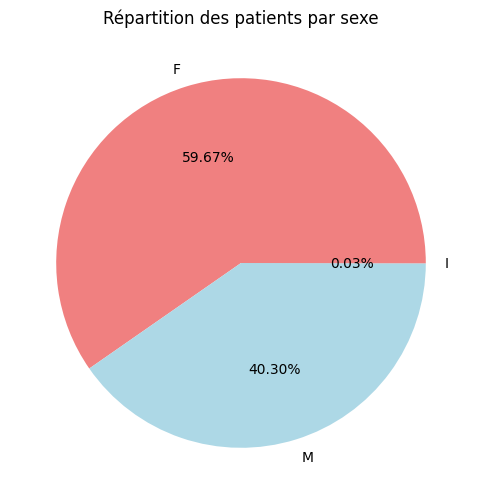

In [12]:
df = pd.read_excel("Vitamine_D.xlsx")
# Créer un diagramme en secteurs pour la répartition des sexes
plt.figure(figsize=(8, 6))
df['Sexe'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['lightcoral', 'lightblue'])
plt.title('Répartition des patients par sexe')
plt.ylabel('')
plt.show()

La colonne "Sexe" contenant des valeurs incorrectes comme "I", on doit alors identifier et traiter cette valeur.

In [13]:
# Supposons que 'finaldata' soit votre DataFrame principal

# Vérifier les valeurs uniques dans la colonne 'Sexe'
valeurs_sexe = df['Sexe'].unique()
print(f"Valeurs uniques dans la colonne 'Sexe' : {valeurs_sexe}")

# Identifier et corriger les valeurs incorrectes
valeurs_incorrectes = df[~df['Sexe'].isin(['M', 'F'])]
print(f"Valeurs incorrectes trouvées : \n{valeurs_incorrectes}")

# Correction des valeurs incorrectes
df['Sexe'] = df['Sexe'].apply(lambda x: x if x in ['M', 'F'] else 'NaN')

# Supprimer les lignes contenant des valeurs incorrectes
df = df[df['Sexe'].isin(['M', 'F'])]

# Vérifier les valeurs uniques après correction
valeurs_sexe_correctes = df['Sexe'].unique()
print(f"Valeurs uniques après correction dans la colonne 'Sexe' : {valeurs_sexe_correctes}")

Valeurs uniques dans la colonne 'Sexe' : ['F' 'M' 'I']
Valeurs incorrectes trouvées : 
          IPP Sexe  AGE                                       Examen  \
70763  150064    I   17                                          CRP   
70764  150064    I   17                                      CALCIUM   
70765  150064    I   17                                    PHOSPHORE   
70766  150064    I   17                                TRIGLYCÉRIDES   
70767  150064    I   17                            Cholestérol total   
70768  150064    I   17                              Cholestérol HDL   
70769  150064    I   17                              Cholestérol LDL   
70770  150064    I   17                                     ALBUMINE   
70771  150064    I   17                                   CRÉATININE   
70772  150064    I   17  MOTIF DE LA NON-CONFORMITÉ DES ÉCHANTILLONS   
70773  150064    I   17                                   VITAMINE D   
70774  150064    I   17                          

**<span style="color:green; margin-left: 40px;">II - 2 - Nettoyage de la colonne Résultat</span>**

In [14]:
#remplacer la case ou il y'a >val ou <val par la val elle meme
# Fonction pour convertir les valeurs de la forme '>x' ou '<x' en x
import re
def clean_result(value):
    if isinstance(value, str) and re.match(r'[><]\d+(\.\d+)?', value):
        return float(value[1:])
    else:
        return value

# Appliquer la fonction à la colonne 'Résultat'
df['Résultat'] = df['Résultat'].apply(clean_result)

In [15]:
#supprimer les lignes contenant des valeurs non numeriques dans la colonne résultat
# Convertir la colonne "Résultat" en numérique avec conversion forcée des non-numériques en NaN
df['Résultat'] = pd.to_numeric(df['Résultat'], errors='coerce')

# Supprimer les lignes avec des valeurs NaN dans la colonne "Résultat"
df = df.dropna(subset=['Résultat'])

In [16]:
print(df.describe())

                 IPP           AGE       Résultat
count   71626.000000  71626.000000   71626.000000
mean    99905.541382     45.820205      90.702668
std     45951.530474     20.378065    1086.464130
min       309.000000      0.000000       0.000000
25%     60554.000000     28.000000       2.042500
50%    120199.000000     47.000000      17.000000
75%    135352.000000     62.000000      74.000000
max    154449.000000     93.000000  219923.500000


In [17]:
# Sauvegarder les modifications dans un nouveau fichier Excel
df.to_excel("Vitamine_D_modified.xlsx", index=False)
print("Les modifications ont été sauvegardées dans le fichier 'Vitamine_D_modified.xlsx'")

Les modifications ont été sauvegardées dans le fichier 'Vitamine_D_modified.xlsx'


In [18]:
# Charger le fichier Excel
df = pd.read_excel("Vitamine_D_modified.xlsx")

# Nombre de lignes
nombre_de_lignes = df.shape[0]

# Nombre de patients uniques (si 'IPP' est l'identifiant des patients)
nombre_de_patients = df['IPP'].nunique()

print(f"Nombre de lignes dans le DataFrame après nettoyage : {nombre_de_lignes}")
print(f"Nombre de patients uniques : {nombre_de_patients}")

Nombre de lignes dans le DataFrame après nettoyage : 71626
Nombre de patients uniques : 1105


**<span style="color:red; margin-left: 20px;">III - Visualisation</span>**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**<span style="color:green; margin-left: 40px;">III -1- Pie chart  </span>**

**<span style="color:black; margin-left: 60px;">a- Pie chart de la colonne sexe </span>**

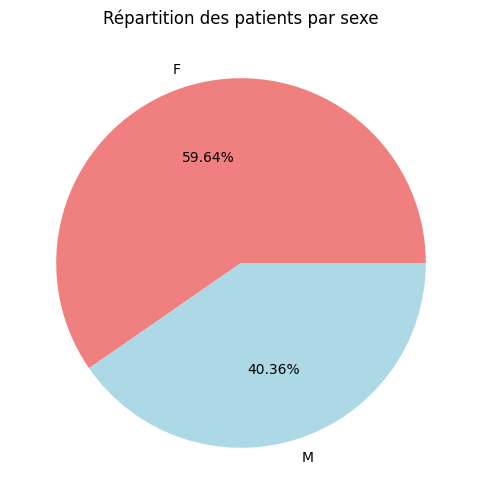

In [20]:
df = pd.read_excel("Vitamine_D_modified.xlsx")
# Créer un diagramme en secteurs pour la répartition des sexes
plt.figure(figsize=(8, 6))
df['Sexe'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['lightcoral', 'lightblue'])
plt.title('Répartition des patients par sexe')
plt.ylabel('')
plt.show()

**<span style="color:black; margin-left: 60px;">b- Pie chart de la colonne Age </span>**

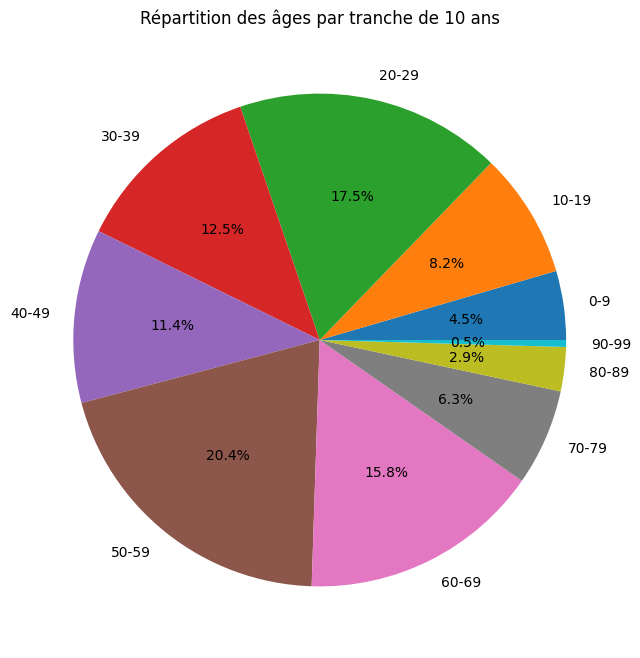

In [21]:
# Supprimer les lignes en double basées sur la colonne "IPP" pour éviter la répétition
df_unique_ipp = df.drop_duplicates(subset='IPP')

# Créer des intervalles d'âge
bins = range(0, max(df_unique_ipp['AGE']) + 10, 10)

# Créer un histogramme pour obtenir les compte par tranche d'âge
counts, _ = np.histogram(df_unique_ipp['AGE'], bins=bins)

# Créer un pie chart à partir des comptes par tranche d'âge
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=[f'{bin}-{bin+9}' for bin in bins[:-1]], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Répartition des âges par tranche de 10 ans')
plt.show()


**<span style="color:green; margin-left: 40px;">III -2- Histogrammes  </span>**

**<span style="color:black; margin-left: 60px;">a- Histogramme de la colonne AGE  </span>** 

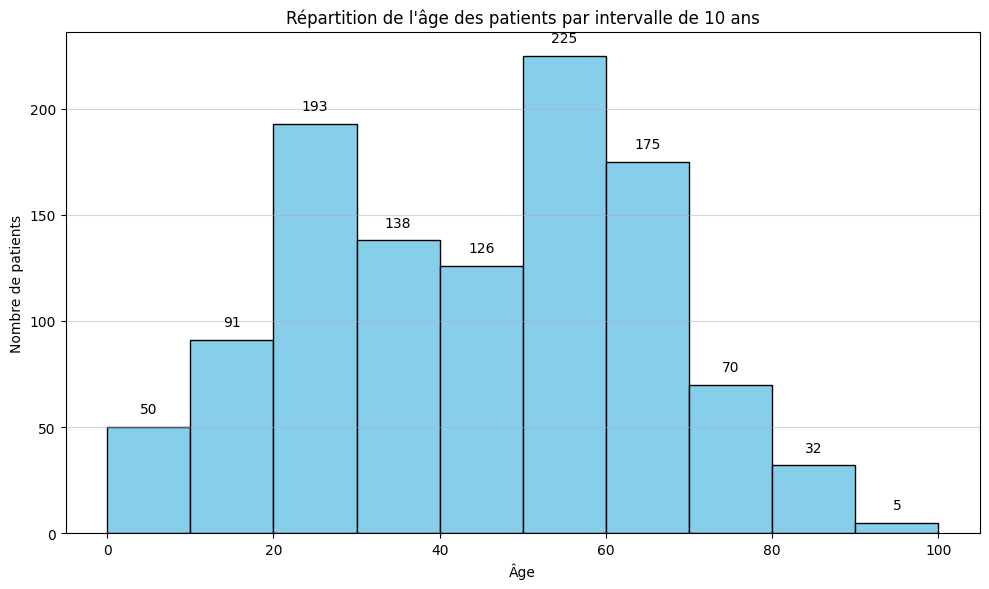

In [22]:
# Supprimer les lignes en double basées sur la colonne "IPP" pour éviter la répétition
df_unique_ipp = df.drop_duplicates(subset='IPP')

# Créer l'histogramme
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(df_unique_ipp['AGE'], bins=range(0, max(df_unique_ipp['AGE']) + 10, 10), color='skyblue', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Âge')
plt.ylabel('Nombre de patients')
plt.title('Répartition de l\'âge des patients par intervalle de 10 ans')

# Afficher le nombre exact de patients sur chaque histogramme
for i, count in enumerate(counts):
    plt.text(bins[i] + 5, count + 5, str(int(count)), ha='center', va='bottom')

# Afficher l'histogramme
plt.grid(axis='y', alpha=0.5)  # Ajouter une grille pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la disposition pour éviter le chevauchement des étiquettes
plt.show()

**<span style="color:black; margin-left: 60px;">b- Histogramme de la colonne Examen  </span>**

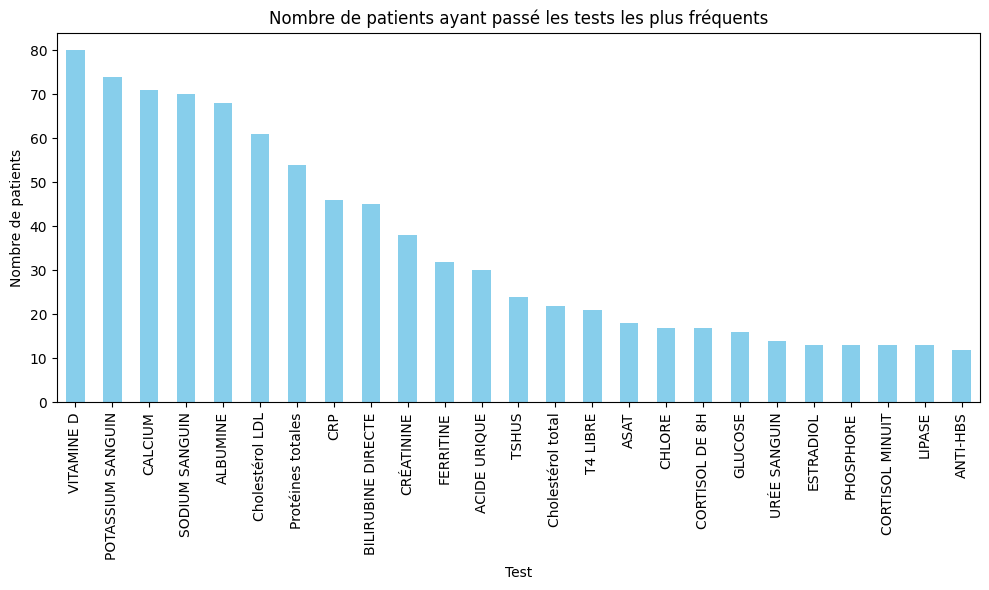

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Supprimer les doublons de l'IPP pour ne compter chaque patient qu'une seule fois
unique_patients = df.drop_duplicates(subset='IPP')

# Groupement par test et comptage du nombre de patients pour chaque test
examen_counts = unique_patients['Examen'].value_counts()

# Tri des tests par nombre de patients décroissant
examen_counts = examen_counts.sort_values(ascending=False)

# Sélection des tests les plus fréquents (par exemple, les 25 premiers tests)
top_tests = examen_counts.head(25)

# Création du graphique à barres pour afficher les comptages des tests les plus fréquents
plt.figure(figsize=(10, 6))
top_tests.plot(kind='bar', color='skyblue')

# Ajout des labels et du titre
plt.xlabel('Test')
plt.ylabel('Nombre de patients')
plt.title('Nombre de patients ayant passé les tests les plus fréquents')

# Affichage du graphique
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster automatiquement la disposition pour éviter le chevauchement des étiquettes
plt.show()


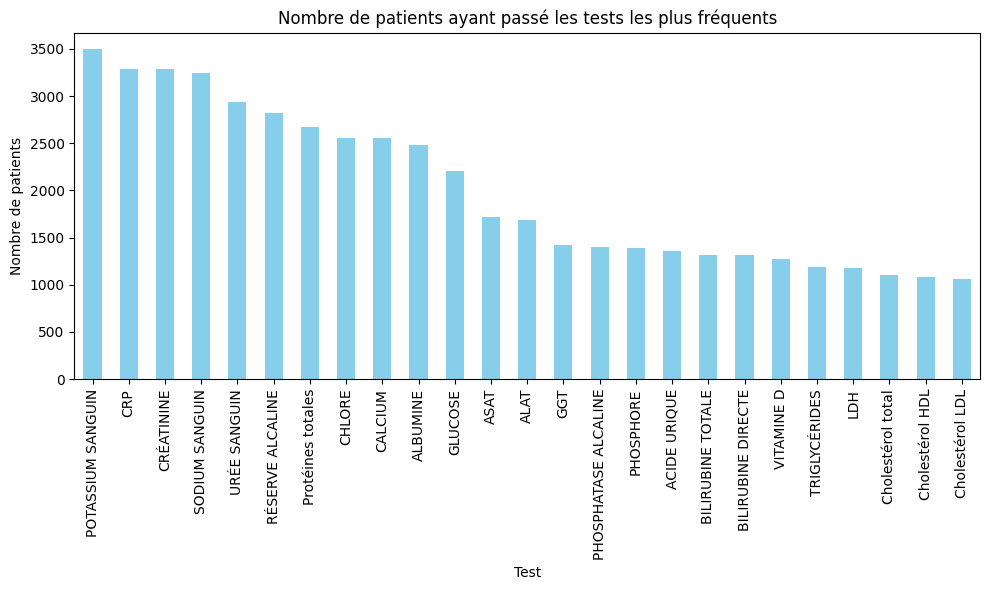

In [24]:
# Groupement par test et comptage du nombre de patients pour chaque test
examen_counts = df['Examen'].value_counts()

# Tri des tests par nombre de patients décroissant
examen_counts = examen_counts.sort_values(ascending=False)

# Sélection des tests les plus fréquents (par exemple, les 25 premiers tests)
top_tests = examen_counts.head(25)

# Création du graphique à barres pour afficher les comptages des tests les plus fréquents
plt.figure(figsize=(10, 6))
top_tests.plot(kind='bar', color='skyblue')

# Ajout des labels et du titre
plt.xlabel('Test')
plt.ylabel('Nombre de patients')
plt.title('Nombre de patients ayant passé les tests les plus fréquents')

# Affichage du graphique
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster automatiquement la disposition pour éviter le chevauchement des étiquettes
plt.show()

**<span style="color:green; margin-left: 40px;">III -3- Lineplot  </span>**

**<span style="color:black; margin-left: 60px;"> a- Lineplot de la colonne Examen[VITAMINE D] </span>**

C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\3900535563.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vitamine_d['Date demande'] = pd.to_datetime(df_vitamine_d['Date demande'])


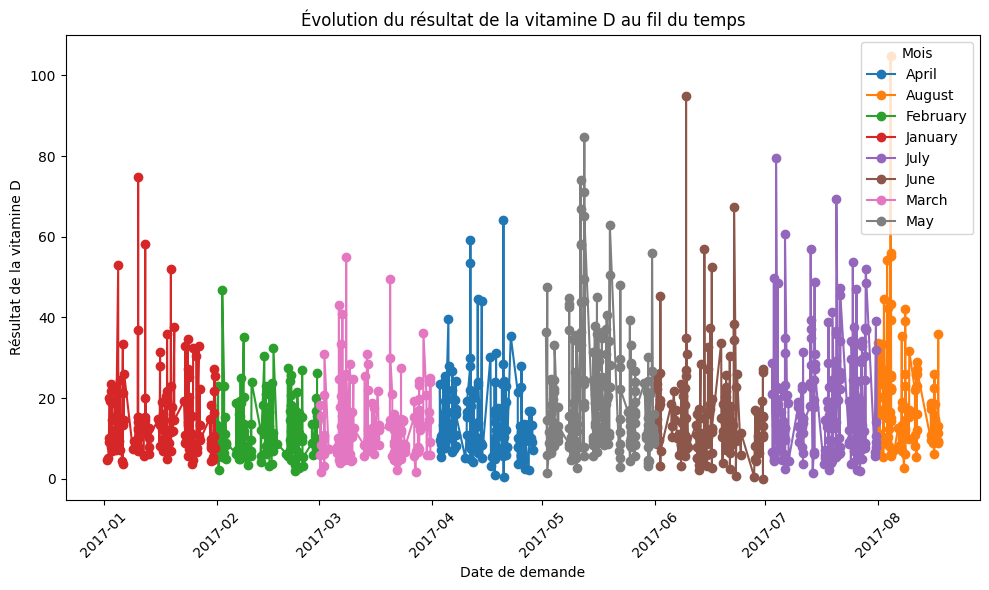

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrer les données pour ne conserver que les lignes correspondant au test de la vitamine D
df_vitamine_d = df[df['Examen'] == 'VITAMINE D']

# Convertir la colonne 'Date demande' en type datetime si elle n'est pas déjà convertie
df_vitamine_d['Date demande'] = pd.to_datetime(df_vitamine_d['Date demande'])

# Trier les données par date de demande
df_vitamine_d = df_vitamine_d.sort_values(by='Date demande')

# Groupement des données par mois
df_vitamine_d['Month'] = df_vitamine_d['Date demande'].dt.month_name()
grouped = df_vitamine_d.groupby('Month')

# Tracer le lineplot de la vitamine D pour chaque mois avec une couleur différente
plt.figure(figsize=(10, 6))
for month, group in grouped:
    plt.plot(group['Date demande'], group['Résultat'], marker='o', label=month, linestyle='-')

# Ajouter des labels et un titre
plt.xlabel('Date de demande')
plt.ylabel('Résultat de la vitamine D')
plt.title('Évolution du résultat de la vitamine D au fil du temps')

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajouter une légende
plt.legend(title='Mois')

# Affichage du lineplot
plt.tight_layout()
plt.show()

In [26]:
#########H HNA au lieun de .sum() reditha .mean()

C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\1507404056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vitamine_d['Date demande'] = pd.to_datetime(df_vitamine_d['Date demande'])
C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\1507404056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vitamine_d['Mois'] = df_vitamine_d['Date demande'].dt.month


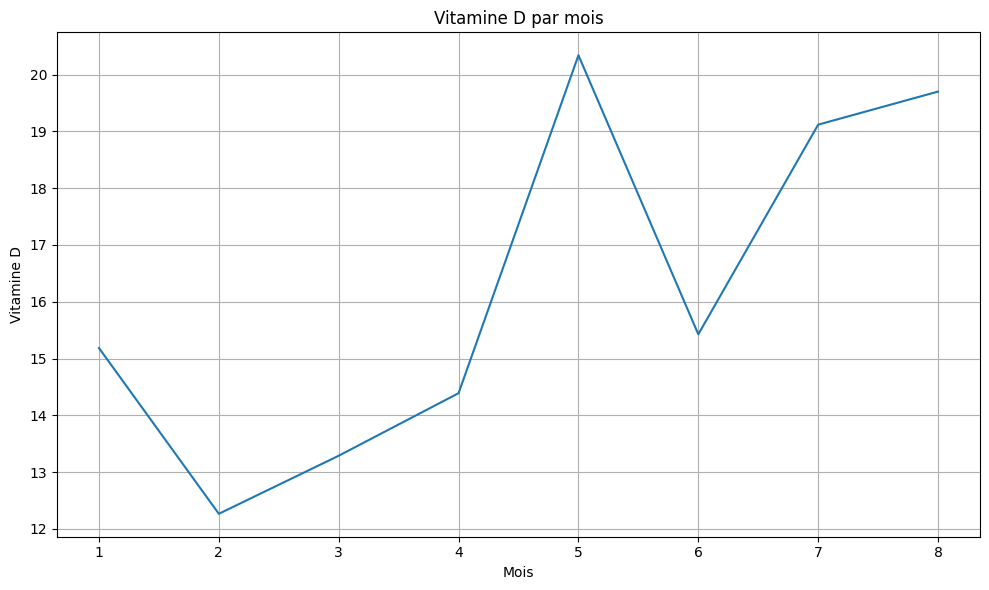

In [27]:
# Filtrer les lignes correspondant au test de la vitamine D
df_vitamine_d = df[df['Examen'] == 'VITAMINE D']

# Convertir la colonne 'Date demande' en format datetime
df_vitamine_d['Date demande'] = pd.to_datetime(df_vitamine_d['Date demande'])

# Extraire le mois de la colonne 'Date demande' et créer une nouvelle colonne 'Mois'
df_vitamine_d['Mois'] = df_vitamine_d['Date demande'].dt.month

# Regrouper par mois et calculer la somme de la vitamine D pour chaque mois
df_monthly = df_vitamine_d.groupby('Mois')['Résultat'].mean()

# Créer un stacked line plot
plt.figure(figsize=(10, 6))
df_monthly.plot(kind='line', stacked=True)

# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Vitamine D')
plt.title('Vitamine D par mois')

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()

**<span style="color:green; margin-left: 40px;">III -4- Boxplot  </span>**

**<span style="color:black; margin-left: 60px;"> a- Boxplot de la colonne Examen[VITAMINE D]</span>**

C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\3963159961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vitamine_d['Month'] = df_vitamine_d['Date demande'].dt.month


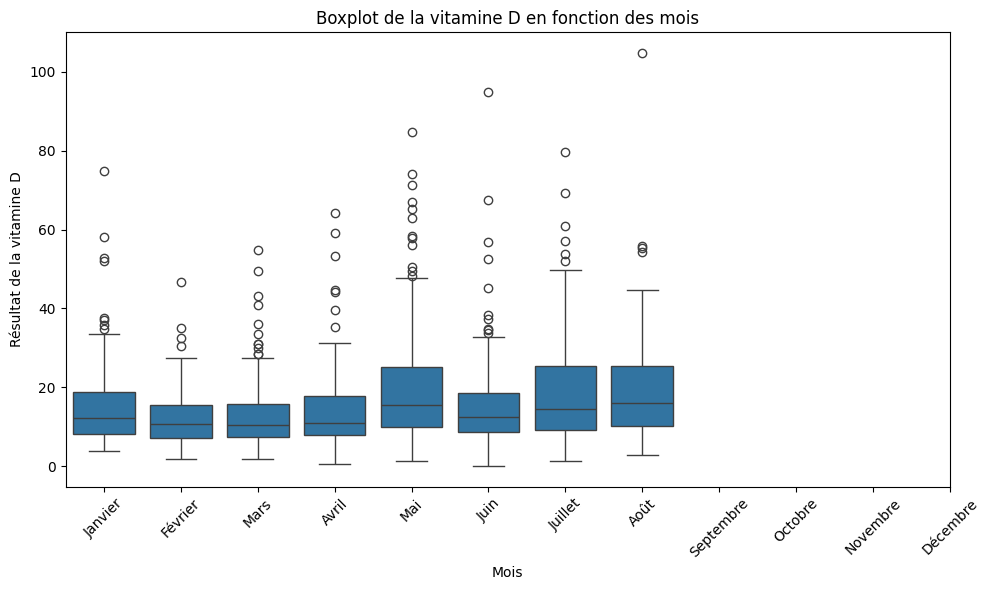

In [28]:
import seaborn as sns

# Regrouper les données par mois et extraire la vitamine D pour chaque mois
df_vitamine_d['Month'] = df_vitamine_d['Date demande'].dt.month
monthly_data = [df_vitamine_d[df_vitamine_d['Month'] == month]['Résultat'] for month in range(1, 13)]

# Tracer le boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Résultat', data=df_vitamine_d)
plt.title('Boxplot de la vitamine D en fonction des mois')
plt.xlabel('Mois')
plt.ylabel('Résultat de la vitamine D')
plt.xticks(range(12), ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'], rotation=45)
plt.tight_layout()
plt.show()

**<span style="color:green; margin-left: 40px;">III -5- Répartition des Niveaux de Vitamine D chez les Patients  </span>**

**<span style="color:black; margin-left: 60px;"> a- Graphe en barre</span>**

**<span style="color:blue; margin-left: 80px;"> i/ Par Patient</span>**

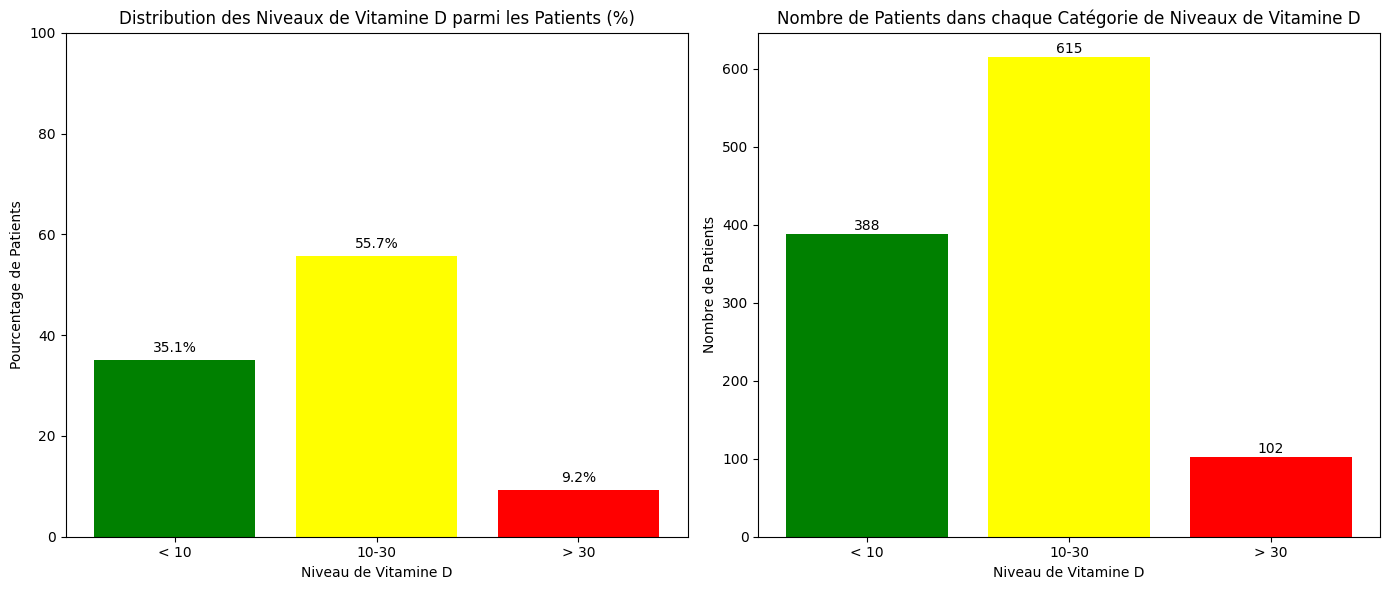

In [29]:
import matplotlib.pyplot as plt

# a. Filtrer les lignes où l'examen est "VITAMINE D"
vitamin_d_df = df[df['Examen'].str.contains('VITAMINE D', na=False)]

# b. Calculer la moyenne des résultats de vitamine D pour chaque patient
vitamin_d_avg = vitamin_d_df.groupby('IPP')['Résultat'].mean().reset_index()

# c. Calculer le nombre total de patients
total_patients = vitamin_d_avg['IPP'].nunique()

# d. Catégoriser les patients en fonction de leur niveau de vitamine D
high_vitamin_d = vitamin_d_avg[vitamin_d_avg['Résultat'] > 30]['IPP'].nunique()
medium_vitamin_d = vitamin_d_avg[(vitamin_d_avg['Résultat'] >= 10) & (vitamin_d_avg['Résultat'] <= 30)]['IPP'].nunique()
low_vitamin_d = vitamin_d_avg[vitamin_d_avg['Résultat'] < 10]['IPP'].nunique()

# e. Calculer les pourcentages
high_percentage = (high_vitamin_d / total_patients) * 100
medium_percentage = (medium_vitamin_d / total_patients) * 100
low_percentage = (low_vitamin_d / total_patients) * 100

# f. Préparer les données pour la visualisation
categories = ['< 10' , '10-30', '> 30']
percentages = [low_percentage, medium_percentage,  high_percentage]
patient_counts = [low_vitamin_d, medium_vitamin_d,  high_vitamin_d]

# g. Créer le graphique en barres
plt.figure(figsize=(14, 6))  # Augmenter la largeur de la figure

# h. Barres pourcentage
plt.subplot(1, 2, 1)
plt.bar(categories, percentages, color=['green', 'yellow', 'red'])
plt.xlabel('Niveau de Vitamine D')
plt.ylabel('Pourcentage de Patients')
plt.title('Distribution des Niveaux de Vitamine D parmi les Patients (%)', fontsize=12)
plt.ylim(0, 100)  # Assurer que l'axe des y va de 0 à 100
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# i. Barres nombre de patients
plt.subplot(1, 2, 2)
plt.bar(categories, patient_counts, color=['green', 'yellow', 'red'])
plt.xlabel('Niveau de Vitamine D')
plt.ylabel('Nombre de Patients')
plt.title('Nombre de Patients dans chaque Catégorie de Niveaux de Vitamine D', fontsize=12)
for i, v in enumerate(patient_counts):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

# j. Ajustements de l'espacement
plt.tight_layout()

# k. Afficher le graphique
plt.show()


**<span style="color:blue; margin-left: 80px;"> ii/ Par Sexe</span>**

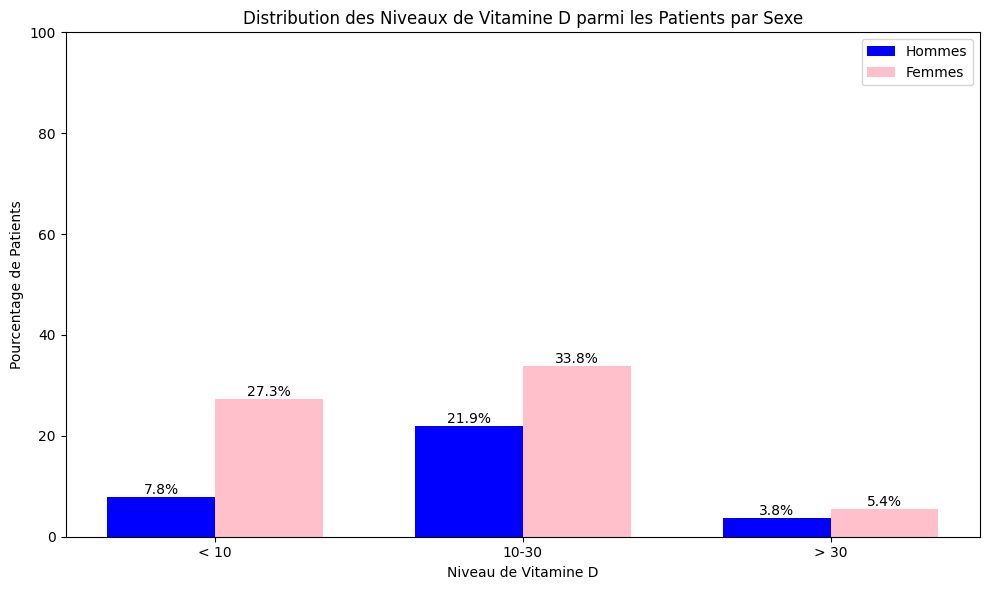

In [30]:
vitamin_d_avg = vitamin_d_avg.merge(df[['IPP', 'Sexe', 'AGE']].drop_duplicates(), on='IPP')

# Filtrer les lignes où l'examen est "VITAMINE D"
vitamin_d_df = df[df['Examen'].str.contains('VITAMINE D', na=False)]

# Calculer le nombre total de patients
total_patients = vitamin_d_avg['IPP'].nunique()

# Définir les catégories de niveaux de vitamine D
high_vitamin_d = vitamin_d_avg[vitamin_d_avg['Résultat'] > 30]
medium_vitamin_d = vitamin_d_avg[(vitamin_d_avg['Résultat'] >= 10) & (vitamin_d_avg['Résultat'] <= 30)]

low_vitamin_d = vitamin_d_avg[vitamin_d_avg['Résultat'] < 10]
# Fonction pour calculer les pourcentages par sexe
def calculate_sex_percentage(df, total_patients):
    male_patients = df[df['Sexe'] == 'M']['IPP'].nunique()
    female_patients = df[df['Sexe'] == 'F']['IPP'].nunique()
    male_percentage = (male_patients / total_patients) * 100
    female_percentage = (female_patients / total_patients) * 100
    return male_percentage, female_percentage

# Calculer les pourcentages par sexe dans chaque catégorie
high_male_percentage, high_female_percentage = calculate_sex_percentage(high_vitamin_d, total_patients)
medium_male_percentage, medium_female_percentage = calculate_sex_percentage(medium_vitamin_d, total_patients)
low_male_percentage, low_female_percentage = calculate_sex_percentage(low_vitamin_d, total_patients)

# Préparer les données pour la visualisation
categories = ['< 10', '10-30', '> 30']
male_percentages = [low_male_percentage, medium_male_percentage,  high_male_percentage]
female_percentages = [low_female_percentage, medium_female_percentage,  high_female_percentage]

# Créer le graphique en barres
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(categories))

bar1 = plt.bar(index, male_percentages, bar_width, label='Hommes', color='blue')
bar2 = plt.bar([i + bar_width for i in index], female_percentages, bar_width, label='Femmes', color='pink')

plt.xlabel('Niveau de Vitamine D')
plt.ylabel('Pourcentage de Patients')
plt.title('Distribution des Niveaux de Vitamine D parmi les Patients par Sexe')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.ylim(0, 100)  # Assurer que l'axe des y va de 0 à 100
plt.legend()

# Ajouter les pourcentages au-dessus des barres
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [31]:
#####Correction du code 

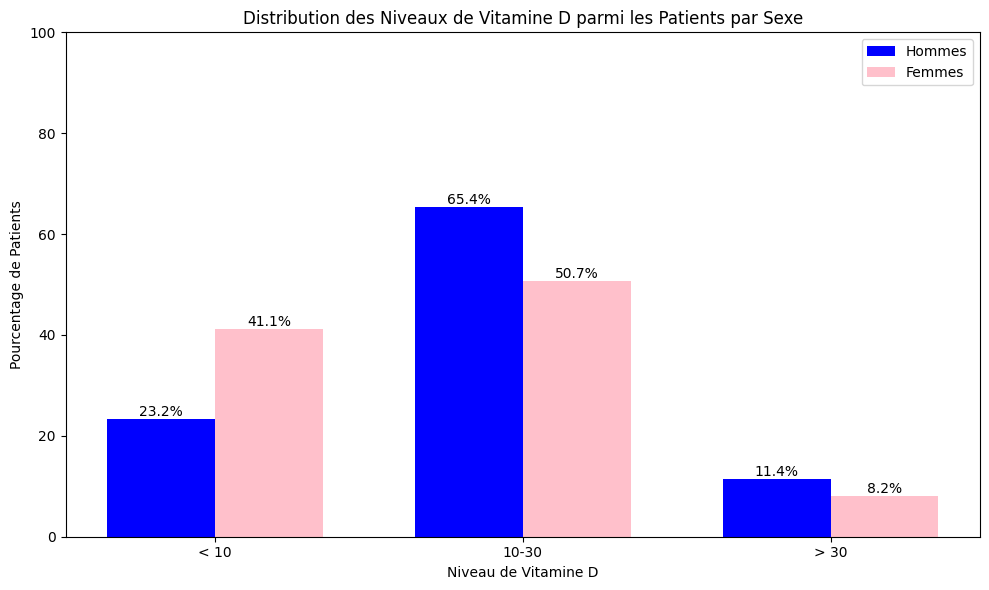

In [32]:
# a. Filtrer les lignes où l'examen est "VITAMINE D"
vitamin_d_df = df[df['Examen'].str.contains('VITAMINE D', na=False)]

# b. Calculer la moyenne des résultats de vitamine D pour chaque patient
vitamin_d_avg = vitamin_d_df.groupby('IPP')['Résultat'].mean().reset_index()

# Suppression des doublons et fusion des informations démographiques
vitamin_d_avg = vitamin_d_avg.merge(df[['IPP', 'Sexe', 'AGE']].drop_duplicates(), on='IPP')

# Calculer le nombre total de patients masculins et féminins
total_male_patients = vitamin_d_avg[vitamin_d_avg['Sexe'] == 'M']['IPP'].nunique()
total_female_patients = vitamin_d_avg[vitamin_d_avg['Sexe'] == 'F']['IPP'].nunique()

# Définir les catégories de niveaux de vitamine D
high_vitamin_d = vitamin_d_avg[vitamin_d_avg['Résultat'] > 30]
medium_vitamin_d = vitamin_d_avg[(vitamin_d_avg['Résultat'] >= 10) & (vitamin_d_avg['Résultat'] <= 30)]
low_vitamin_d = vitamin_d_avg[vitamin_d_avg['Résultat'] < 10]

# Fonction pour calculer les pourcentages par sexe dans chaque catégorie par rapport au total des patients du même sexe
def calculate_sex_percentage(df, total_males, total_females):
    male_patients = df[df['Sexe'] == 'M']['IPP'].nunique()
    female_patients = df[df['Sexe'] == 'F']['IPP'].nunique()
    male_percentage = (male_patients / total_males) * 100 if total_males != 0 else 0
    female_percentage = (female_patients / total_females) * 100 if total_females != 0 else 0
    return male_percentage, female_percentage

# Calculer les pourcentages par sexe dans chaque catégorie par rapport au total des patients du même sexe
low_male_percentage, low_female_percentage = calculate_sex_percentage(low_vitamin_d, total_male_patients, total_female_patients)
medium_male_percentage, medium_female_percentage = calculate_sex_percentage(medium_vitamin_d, total_male_patients, total_female_patients)
high_male_percentage, high_female_percentage = calculate_sex_percentage(high_vitamin_d, total_male_patients, total_female_patients)

# Préparer les données pour la visualisation
categories = ['< 10', '10-30', '> 30']
male_percentages = [low_male_percentage, medium_male_percentage, high_male_percentage]
female_percentages = [low_female_percentage, medium_female_percentage, high_female_percentage]

# Créer le graphique en barres
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(categories))

bar1 = plt.bar(index, male_percentages, bar_width, label='Hommes', color='blue')
bar2 = plt.bar([i + bar_width for i in index], female_percentages, bar_width, label='Femmes', color='pink')

plt.xlabel('Niveau de Vitamine D')
plt.ylabel('Pourcentage de Patients')
plt.title('Distribution des Niveaux de Vitamine D parmi les Patients par Sexe')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.ylim(0, 100)  # Assurer que l'axe des y va de 0 à 100
plt.legend()

# Ajouter les pourcentages au-dessus des barres
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Afficher le graphique
plt.tight_layout()
plt.show()

**<span style="color:blue; margin-left: 80px;"> iii/ Par tranche d'AGE</span>**

C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\930760638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitamin_d_df['Tranche_Age'] = pd.cut(vitamin_d_df['AGE'], bins=bins, labels=labels, right=False)
C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\930760638.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = vitamin_d_df.groupby('Tranche_Age')


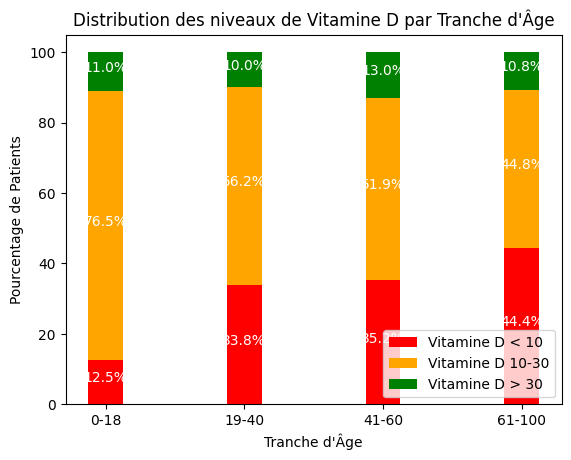

In [33]:
# Ajouter une colonne pour les tranches d'âge
bins = [0, 18, 40, 60, 100]
labels = ['0-18', '19-40', '41-60', '61-100']
vitamin_d_df['Tranche_Age'] = pd.cut(vitamin_d_df['AGE'], bins=bins, labels=labels, right=False)

# Calculer les pourcentages pour chaque tranche d'âge et chaque catégorie de vitamine D
age_groups = vitamin_d_df.groupby('Tranche_Age')
percentages = age_groups['Résultat'].agg([
    lambda x: (x < 10).mean() * 100, 
    lambda x: ((x >= 10) & (x <= 30)).mean() * 100, 
    lambda x: (x > 30).mean() * 100
]).reset_index()
percentages.columns = ['Tranche_Age', 'Vitamine D < 10', 'Vitamine D 10-30', 'Vitamine D > 30']

# Tracer les pourcentages
fig, ax = plt.subplots()
width = 0.25

ax.bar(percentages['Tranche_Age'], percentages['Vitamine D < 10'], width, label='Vitamine D < 10', color='red')
ax.bar(percentages['Tranche_Age'], percentages['Vitamine D 10-30'], width, bottom=percentages['Vitamine D < 10'], label='Vitamine D 10-30', color='orange')
ax.bar(percentages['Tranche_Age'], percentages['Vitamine D > 30'], width, bottom=percentages['Vitamine D < 10'] + percentages['Vitamine D 10-30'], label='Vitamine D > 30', color='green')

ax.set_xlabel('Tranche d\'Âge')
ax.set_ylabel('Pourcentage de Patients')
ax.set_title('Distribution des niveaux de Vitamine D par Tranche d\'Âge')
ax.legend()

# Afficher les pourcentages sur les barres
for i in range(len(percentages)):
    ax.text(i, percentages['Vitamine D < 10'][i] / 2, f"{percentages['Vitamine D < 10'][i]:.1f}%", ha='center', color='white')
    ax.text(i, percentages['Vitamine D < 10'][i] + percentages['Vitamine D 10-30'][i] / 2, f"{percentages['Vitamine D 10-30'][i]:.1f}%", ha='center', color='white')
    ax.text(i, percentages['Vitamine D < 10'][i] + percentages['Vitamine D 10-30'][i] + percentages['Vitamine D > 30'][i] / 2, f"{percentages['Vitamine D > 30'][i]:.1f}%", ha='center', color='white')

plt.show()

**<span style="color:black; margin-left: 60px;"> b- Boxplot (par tranche d'AGE)</span>**

C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\2970456061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitamin_d_df['Tranche_Age'] = pd.cut(vitamin_d_df['AGE'], bins=age_bins, labels=age_labels)


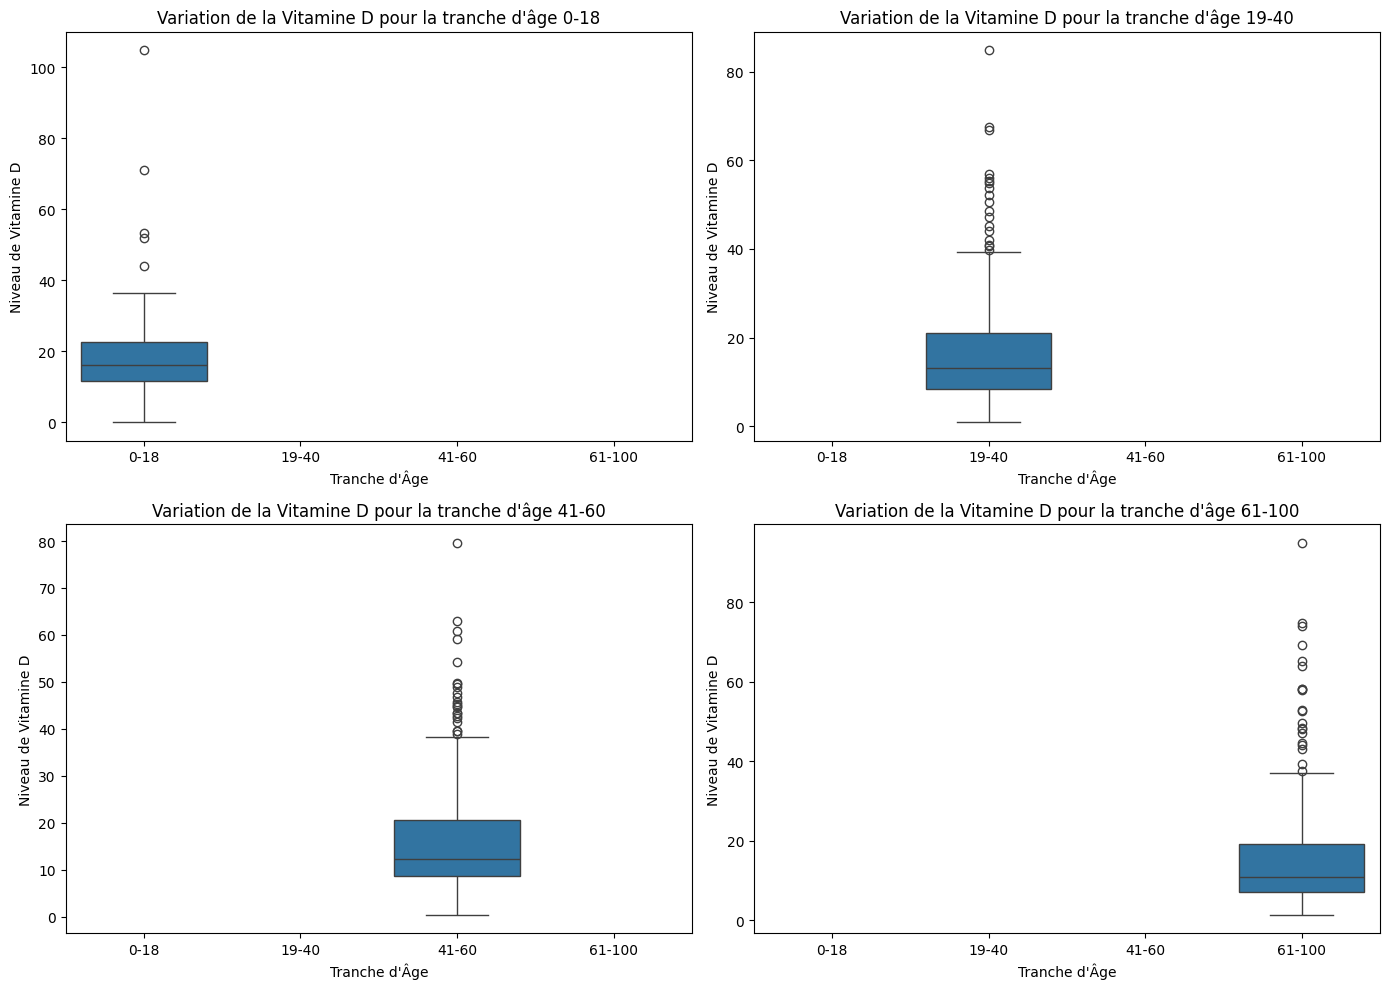

In [34]:
# Filtrer les lignes où l'examen est "VITAMINE D"
vitamin_d_df = df[df['Examen'].str.contains('VITAMINE D', na=False)]

# Définir les tranches d'âge
age_bins = [0, 18, 40, 60, 100]
age_labels = ['0-18', '19-40', '41-60', '61-100']
vitamin_d_df['Tranche_Age'] = pd.cut(vitamin_d_df['AGE'], bins=age_bins, labels=age_labels)

# Créer des graphiques de distribution pour chaque tranche d'âge
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, age_label in enumerate(age_labels):
    age_df = vitamin_d_df[vitamin_d_df['Tranche_Age'] == age_label]
    sns.boxplot(x=age_df['Tranche_Age'], y=age_df['Résultat'], ax=axes[i])
    axes[i].set_title(f'Variation de la Vitamine D pour la tranche d\'âge {age_label}')
    axes[i].set_xlabel('Tranche d\'Âge')
    axes[i].set_ylabel('Niveau de Vitamine D')

plt.tight_layout()
plt.show()

**<span style="color:black; margin-left: 60px;"> c- Line plot (par tranche d'AGE)</span>**

C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\249381242.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitamin_d_df['Tranche_Age'] = pd.cut(vitamin_d_df['AGE'], bins=age_bins, labels=age_labels)


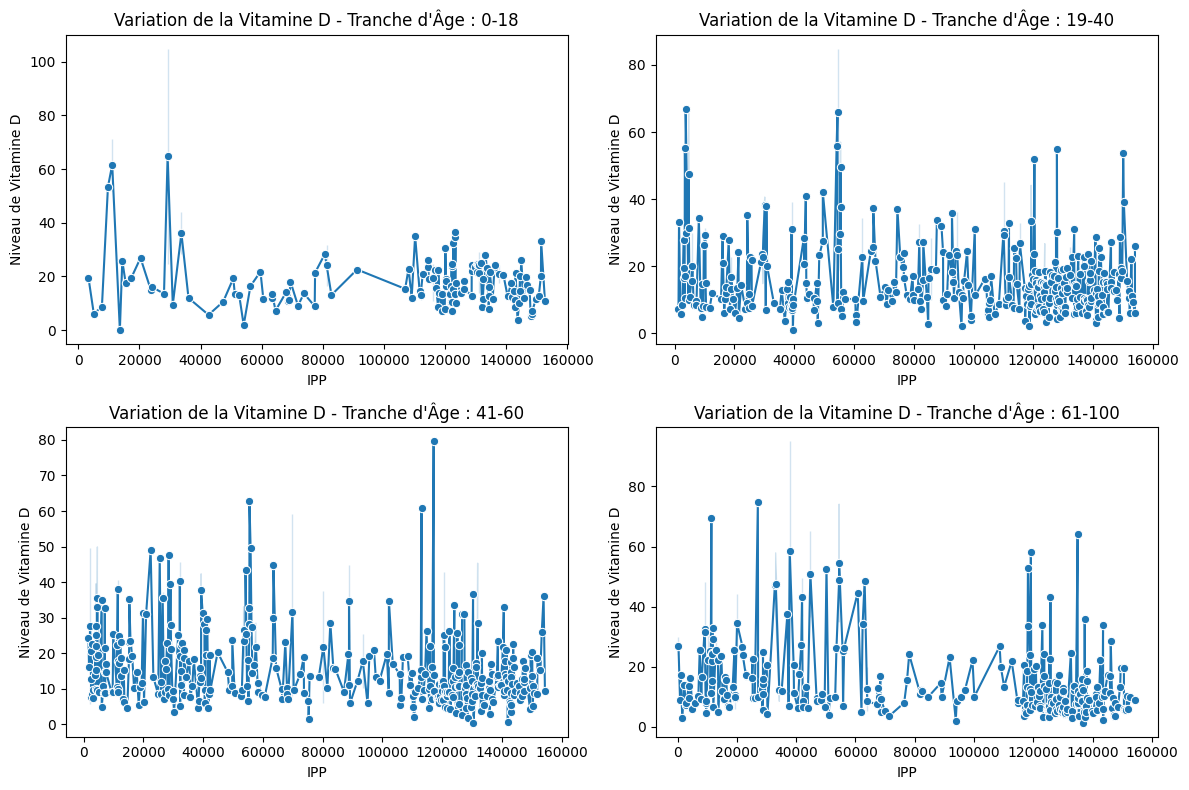

In [35]:
# Filtrer les lignes où l'examen est "VITAMINE D"
vitamin_d_df = df[df['Examen'].str.contains('VITAMINE D', na=False)]

# Définir les tranches d'âge
age_bins = [0, 18, 40, 60, 100]
age_labels = ['0-18', '19-40', '41-60', '61-100']
vitamin_d_df['Tranche_Age'] = pd.cut(vitamin_d_df['AGE'], bins=age_bins, labels=age_labels)

# Créer un line plot pour chaque tranche d'âge
plt.figure(figsize=(12, 8))

for i, age_label in enumerate(age_labels, 1):
    plt.subplot(2, 2, i)
    age_df = vitamin_d_df[vitamin_d_df['Tranche_Age'] == age_label]
    sns.lineplot(data=age_df, x='IPP', y='Résultat', marker='o')
    plt.title(f'Variation de la Vitamine D - Tranche d\'Âge : {age_label}')
    plt.xlabel('IPP')
    plt.ylabel('Niveau de Vitamine D')

plt.tight_layout()
plt.show()

**<span style="color:red; margin-left: 20px;">IV - Filtrage et analyse des examens pertinents</span>**

In [36]:
# Charger la première feuille du fichier Excel en spécifiant la ligne des noms des colonnes

# Convertir tous les noms d'examens en majuscules pour assurer une correspondance cohérente
df['Examen'] = df['Examen'].str.upper()

# Liste des examens à conserver en majuscules
examens_a_conserver = [
    'ACIDE URIQUE', 'ALAT', 'ALBUMINE', 'PHOSPHATASE ALCALINE', 'ASAT', 'BILIRUBINE TOTALE', 
    'CALCIUM', 'CHLORE', 'CHOLESTÉROL LDL', 'CRÉATININE', 
    'FER SÉRIQUE', 'FERRITINE', 'GGT', 'GLUCOSE', 'CHOLESTÉROL HDL', 
    'T4 LIBRE', 'LDH', 'MAGNESIUM PLASMATIQUE', 
    'PHOSPHORE', 'POTASSIUM SANGUIN', 'PRO BNP', 
    'CRP', 'PROTÉINES TOTALES', 'PTH BIO-INTACT (1-84)', 'RÉSERVE ALCALINE', 
    'SODIUM SANGUIN', 'TRANSFERRINE', 'TRIGLYCÉRIDES', 'TSHUS', 'URÉE SANGUIN', 'VITAMINE B12' , 'VITAMINE D'
]

# Filtrer les lignes en fonction des examens à conserver
data_filtre = df[df['Examen'].isin(examens_a_conserver)]

# Créer un DataFrame vide pour stocker les données filtrées pour chaque patient
df_filtre_patients = pd.DataFrame()

# Obtenir la liste unique des IPP des patients
liste_patients = data_filtre['IPP'].unique()

# Boucler sur chaque patient pour filtrer les données
for ipp in liste_patients:
    # Filtrer les lignes pour chaque patient
    df_patient = data_filtre[data_filtre['IPP'] == ipp]
    # Concaténer les données du patient au DataFrame final
    df_filtre_patients = pd.concat([df_filtre_patients, df_patient])

# Enregistrer les données filtrées dans un nouveau fichier Excel
df_filtre_patients.to_excel('Filtered_Patient.xlsx', index=False)

print("Les données filtrées pour chaque patient ont été enregistrées dans le fichier 'Filtered_Patient.xlsx'")


Les données filtrées pour chaque patient ont été enregistrées dans le fichier 'Filtered_Patient.xlsx'


**<span style="color:green; margin-left: 40px;">IV - 1 - Boxplots des résultats pour chaque type de test</span>**

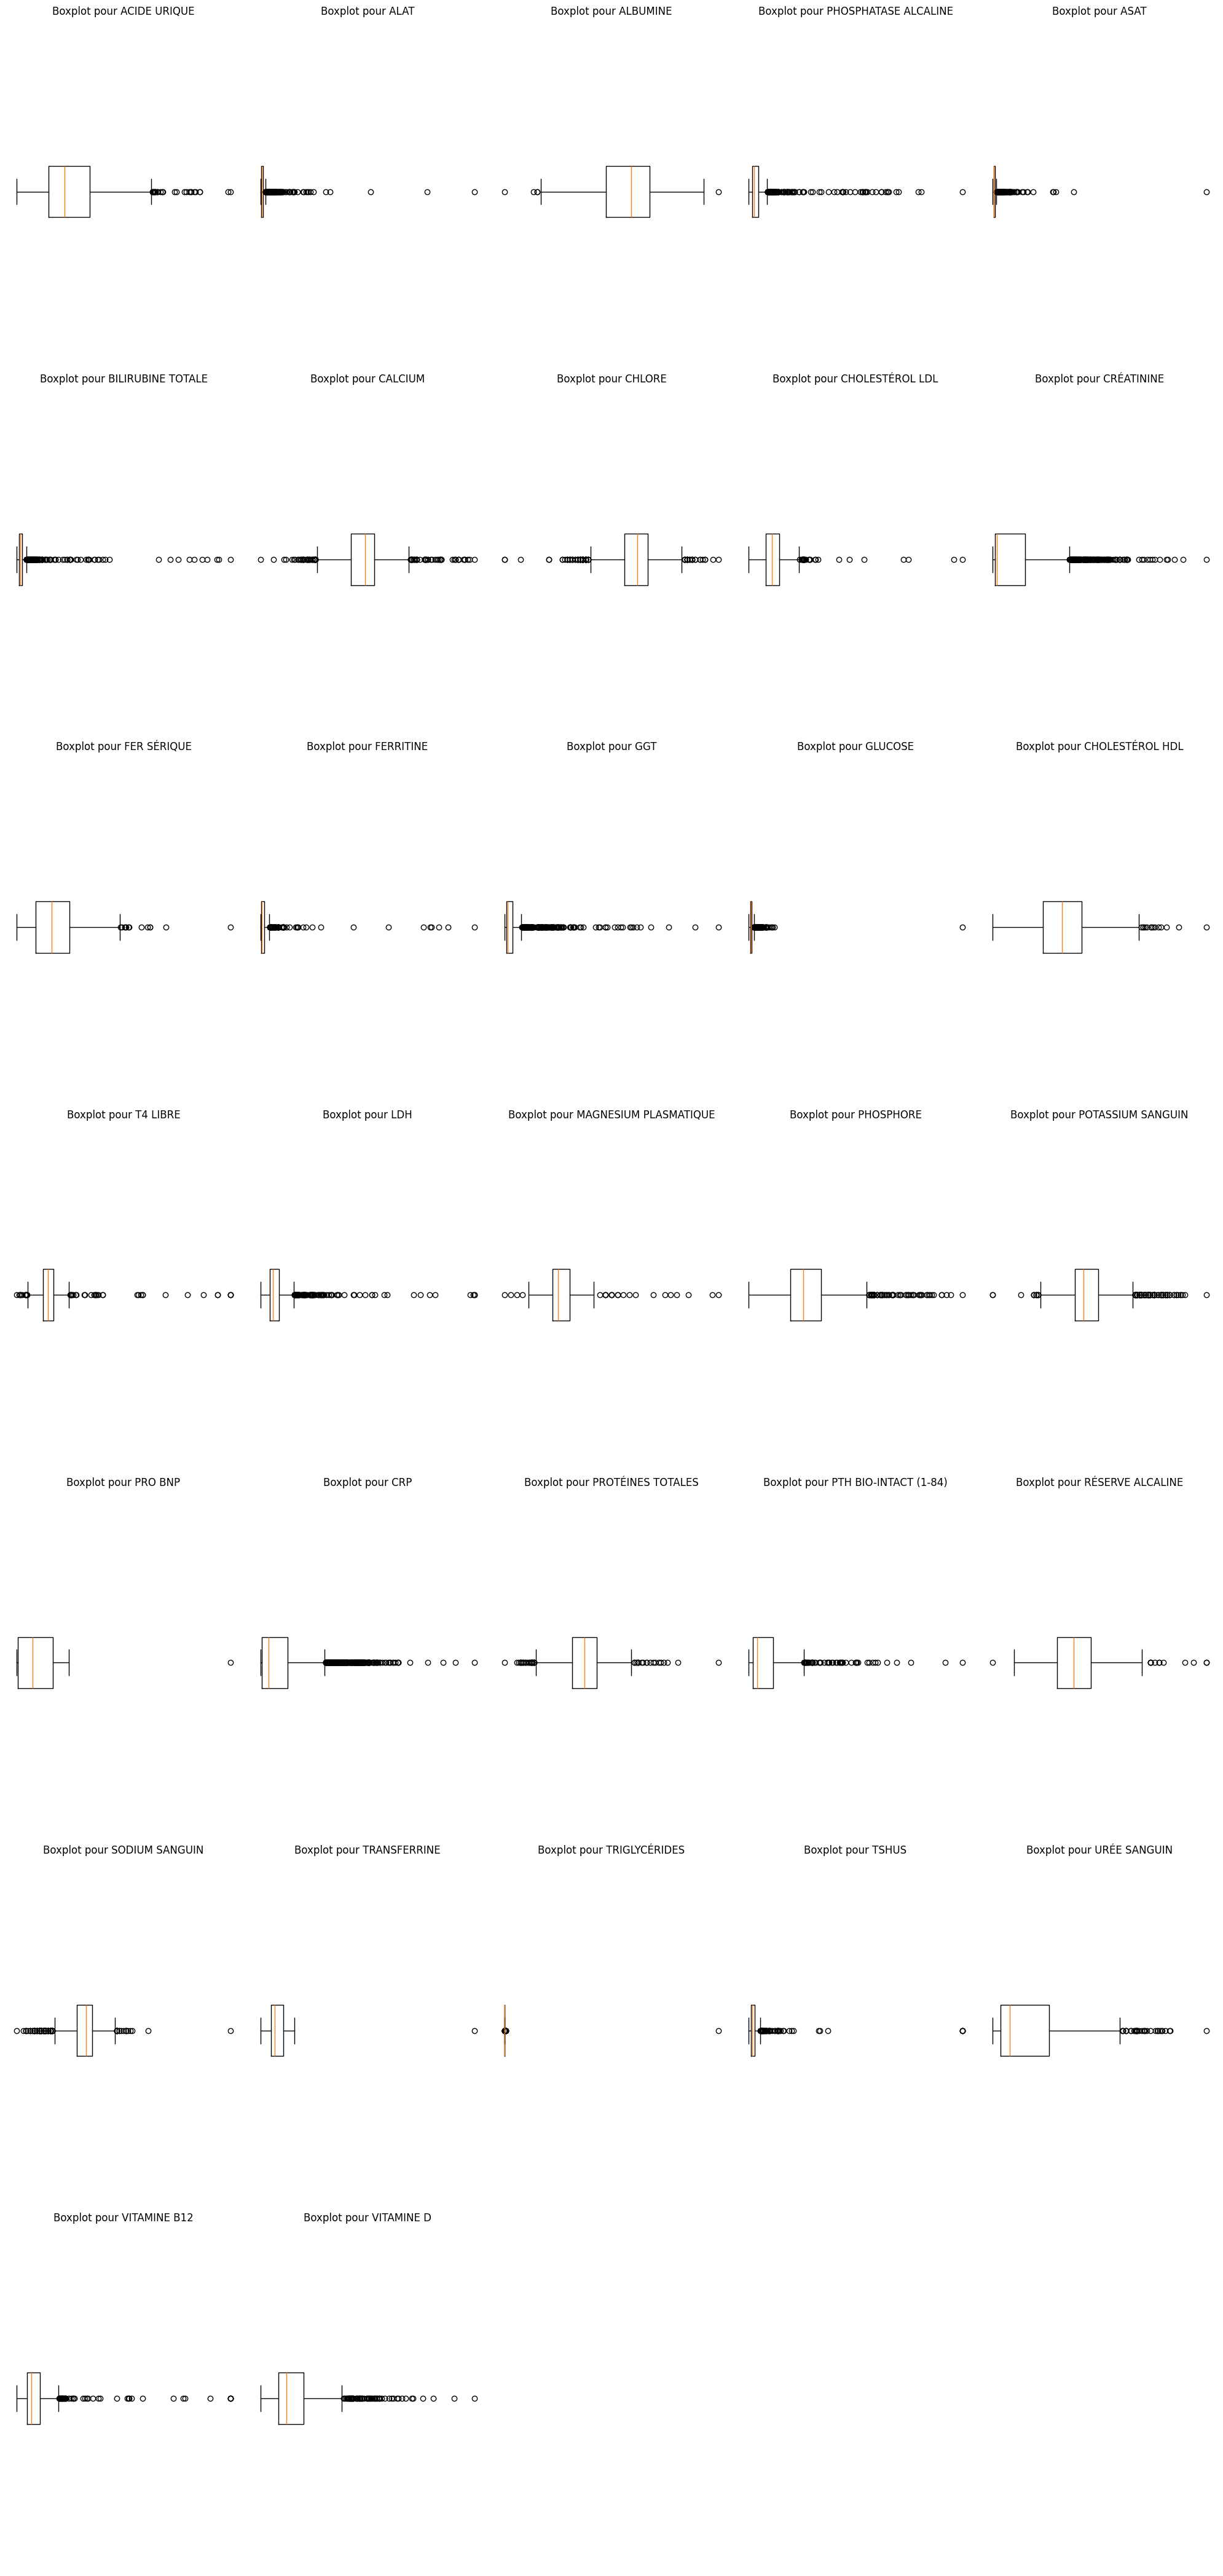

In [37]:
#Charger les données depuis le fichier filtré
df_new = pd.read_excel("Filtered_Patient.xlsx")


# Définir le nombre de boxplots par ligne
boxplots_par_ligne = 5

# Calculer le nombre total de lignes nécessaires
nombre_examens = len(examens_a_conserver)
nombre_lignes = (nombre_examens + boxplots_par_ligne - 1) // boxplots_par_ligne  # Calcul de l'arrondi supérieur

# Créer des boxplots pour chaque test
fig, axs = plt.subplots(nombre_lignes, boxplots_par_ligne, figsize=(20, 6 * nombre_lignes))

for i, examen in enumerate(examens_a_conserver):
    ligne = i // boxplots_par_ligne
    colonne = i % boxplots_par_ligne
    
    # Filtrer les données pour l'examen courant
    data_examen = df_new[df_new['Examen'] == examen]
    
    if not data_examen.empty:
        axs[ligne, colonne].boxplot(data_examen['Résultat'], vert=False)
        axs[ligne, colonne].set_title(f'Boxplot pour {examen}')
        axs[ligne, colonne].set_xlabel('Résultat')

# Pour éviter que les dernières figures soient vides
for ax in axs.flat:
    ax.axis('off')

# Afficher la figure
plt.tight_layout()
plt.show()

In [38]:
# Convertir les valeurs de la colonne 'Résultat' si nécessaire
df_new['Résultat'] = pd.to_numeric(df_new['Résultat'], errors='coerce')

# Calculer le maximum de chaque test
max_tests = df_new.groupby('Examen')['Résultat'].max()

# Afficher les maximums par test
print("Maximum de chaque test :")
print(max_tests)

Maximum de chaque test :
Examen
ACIDE URIQUE               215.80
ALAT                      1997.00
ALBUMINE                    59.00
ASAT                      2919.00
BILIRUBINE TOTALE          334.10
CALCIUM                    157.00
CHLORE                     134.00
CHOLESTÉROL HDL              1.13
CHOLESTÉROL LDL              7.68
CRP                        628.47
CRÉATININE                 364.12
FER SÉRIQUE                350.00
FERRITINE                24237.70
GGT                       1462.00
GLUCOSE                     91.00
LDH                       3325.00
MAGNESIUM PLASMATIQUE       47.00
PHOSPHATASE ALCALINE      2461.00
PHOSPHORE                  140.00
POTASSIUM SANGUIN            9.90
PRO BNP                  35000.00
PROTÉINES TOTALES          140.40
PTH BIO-INTACT (1-84)     1585.00
RÉSERVE ALCALINE            50.00
SODIUM SANGUIN             200.00
T4 LIBRE                   100.00
TRANSFERRINE                19.00
TRIGLYCÉRIDES            10066.00
TSHUS           

**<span style="color:blue">Interpretation :</span>**

**Ferritine :** La ferritine est souvent élevée en cas d'inflammation, d'infection ou de troubles hématologiques. Une valeur de 24237.70 pourrait être considérée comme anormalement élevée, mais cela dépend également du contexte clinique.

**Pro BNP :** Le pro BNP peut être élevé en cas d'insuffisance cardiaque. Une valeur de 35000.00 est élevée et pourrait indiquer une insuffisance cardiaque sévère.

**Triglycérides :** Les triglycérides élevés (10066.00) peuvent être associés à un risque accru de maladies cardiovasculaires et nécessitent souvent des mesures de gestion.

**Créatinine :** Une créatinine élevée (364.12) peut indiquer des problèmes rénaux, bien que cela puisse également varier en fonction de l'âge et d'autres facteurs.

**Calcium :** Un calcium élevé (157.00) peut être anormal et nécessiter une évaluation pour exclure des troubles parathyroïdiens ou d'autres conditions.

**Glucose :** Un taux de glucose élevé (91.00) peut indiquer une prédiabète ou un diabète, selon les normes diagnostiques.

**T4 Libre :** Une valeur de 100.00 pour le T4 libre est normalement considérée comme très élevée et pourrait indiquer une hyperthyroïdie.

 **<span style="color:blue">Justification de l'Inclusion des Valeurs Aberrantes dans l'Analyse</span>**

***Dans le cadre de cette étude visant à évaluer la corrélation entre les résultats des tests biologiques et les niveaux de vitamine D, nous avons choisi d'inclure les valeurs aberrantes dans notre analyse, considérant qu'elles reflètent la variabilité authentique de nos données cliniques.***

1. **Représentativité des Données Réelles :** 
   Les valeurs aberrantes peuvent représenter des situations cliniques réelles et diversifiées qui existent au sein de votre population d'étude. Leur exclusion pourrait conduire à une sous-représentation de la variabilité naturelle des résultats des tests biologiques.

2. **Complexité des Cas Cliniques :** 
   Certaines conditions médicales peuvent présenter des résultats de tests extrêmes ou inhabituels. Inclure ces valeurs permet de capturer la diversité des profils cliniques et de leur impact potentiel sur les niveaux de vitamine D.

3. **Analyse de Cas Rares mais Importants :** 
   Les valeurs aberrantes pourraient représenter des cas rares mais cliniquement significatifs, tels que des conditions pathologiques sévères ou des réponses inhabituelles au traitement, qui méritent une exploration approfondie pour comprendre leur impact sur la corrélation étudiée.

4. **Prévention de la Biais de Sélection :** 
   En excluant les valeurs aberrantes de manière arbitraire, il y a un risque de biais de sélection, où seules les observations conformes à la norme sont prises en compte. Cela pourrait fausser les résultats de l'analyse en négligeant des informations cruciales pour la compréhension globale des relations étudiées.

5. **Considération de la Variabilité Naturelle :** 
   L'inclusion des valeurs aberrantes dans votre analyse permet une prise en compte plus complète de la variabilité naturelle des résultats des tests dans la population étudiée. Cela renforce la robustesse et la généralisabilité des conclusions tirées de votre étude.


## Chapitre 2 : Etude de corrélation  

**<span style="color:red; margin-left: 20px;">I - Etude de la normalité des données </span>**

**<span style="color:green; margin-left: 40px;">I - 1 - Distribution des résultats</span>**

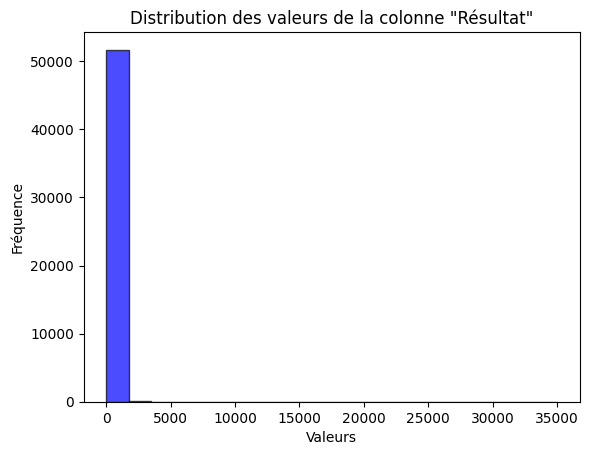

In [39]:
# Tracer l'histogramme des valeurs de la colonne "Résultat" de df_new
plt.hist(df_new['Résultat'], bins=20, color='blue', alpha=0.7, edgecolor='black')  # Tracer l'histogramme avec bordure noire
plt.xlabel('Valeurs')  # Ajouter une étiquette pour l'axe des x
plt.ylabel('Fréquence')  # Ajouter une étiquette pour l'axe des y
plt.title('Distribution des valeurs de la colonne "Résultat"')  # Ajouter un titre au graphique
plt.show()  # Afficher le graphique

**<span style="color:green; margin-left: 40px;">I - 2 - Test de normalité de Shapiro-Wilk</span>**

In [40]:
from scipy.stats import shapiro

# Test de normalité de Shapiro-Wilk (hypothèse nulle : les données sont normalement distribuées)
stat, p = shapiro(df_new['Résultat'].dropna())
print(f'Statistique de test de Shapiro-Wilk: {stat}, p-value: {p}')
if p > 0.05:
    print("La distribution est normale (symétrique).")
else:
    print("La distribution n'est pas normale (peut être asymétrique).")

Statistique de test de Shapiro-Wilk: 0.09479914405197687, p-value: 1.4266766234318128e-161
La distribution n'est pas normale (peut être asymétrique).


C:\Users\SuperElectro\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51776.
  res = hypotest_fun_out(*samples, **kwds)


**<span style="color:green; margin-left: 40px;">I - 3 - Test de normalité avec le Q-Q plot</span>**

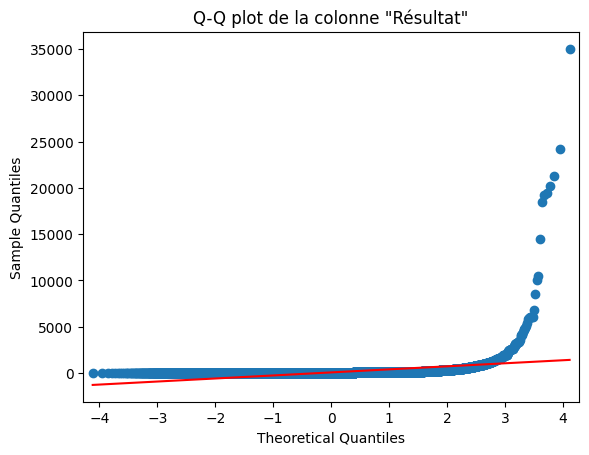

In [41]:
import statsmodels.api as sm

# Tracer le QQ plot
sm.qqplot(df_new['Résultat'], line='s')
plt.title('Q-Q plot de la colonne "Résultat"')
plt.show()

### <span style="color:blue">Analyse de la Distribution des Résultats</span>

1. **Écart par rapport à la ligne de normalité :**  
   La ligne rouge représente une distribution normale théorique. Les points bleus correspondent aux quantiles des données réelles. La présence de points éloignés de cette ligne suggère que la distribution des résultats diverge de la normalité attendue pour une distribution normale.

2. **Queue droite de la distribution :**  
   Les points dans la partie supérieure droite du graphique montrent un écart significatif par rapport à la ligne droite théorique, indiquant la présence de valeurs extrêmes ou d'outliers importants. Cela suggère une queue droite lourde dans la distribution des résultats, avec des valeurs très élevées par rapport à la moyenne.

3. **Queue gauche de la distribution :**  
   Bien que moins prononcé que pour la queue droite, les points dans la partie inférieure gauche du graphique montrent également un écart par rapport à la ligne droite théorique. Cela pourrait indiquer la présence de quelques valeurs très faibles, bien que moins extrêmes.

En résumé, la colonne "Résultat" présente des valeurs extrêmes et une distribution qui dévie significativement de la normalité, surtout dans les queues de la distribution. Pour des analyses spécifiques nécessitant une distribution plus proche de la normalité, il pourrait être bénéfique d'envisager des transformations comme la transformation logarithmique ou l'utilisation de méthodes statistiques robustes qui ne supposent pas la normalité des données.


**<span style="color:red; margin-left: 20px;">II - Corrélations </span>**

**<span style="color:green; margin-left: 40px;">I - 1 - Corrélation entre Vitamine D et l'AGE</span>**

In [42]:
# Reprendre le calcul de la moyenne des niveaux de vitamine D pour chaque IPP
vitamin_d_df = df_new[df_new['Examen'] == 'VITAMINE D']
vitamin_d_avg = vitamin_d_df.groupby('IPP')['Résultat'].mean().reset_index()
vitamin_d_avg = vitamin_d_avg.rename(columns={'Résultat': 'Vitamine_D'})

# Fusionner les données pour ajouter les moyennes de Vitamine D
data = df_new.merge(vitamin_d_avg, on='IPP')

# Exclure les entrées de Vitamine D des examens
data = data[data['Examen'] != 'VITAMINE D']

# Calculer la moyenne des résultats des examens par IPP et Examen
exam_avg = data.groupby(['IPP', 'Examen'])['Résultat'].mean().reset_index()

# Ajouter les moyennes de Vitamine D aux données
finaldata = exam_avg.merge(vitamin_d_avg, on='IPP')

# Ajouter l'âge et le sexe aux données finales
finaldata = finaldata.merge(df_new[['IPP', 'Sexe', 'AGE']].drop_duplicates(), on='IPP')

**<span style="color:black; margin-left: 60px;"> a- Visuellement en utilisant Scatter plot </span>**

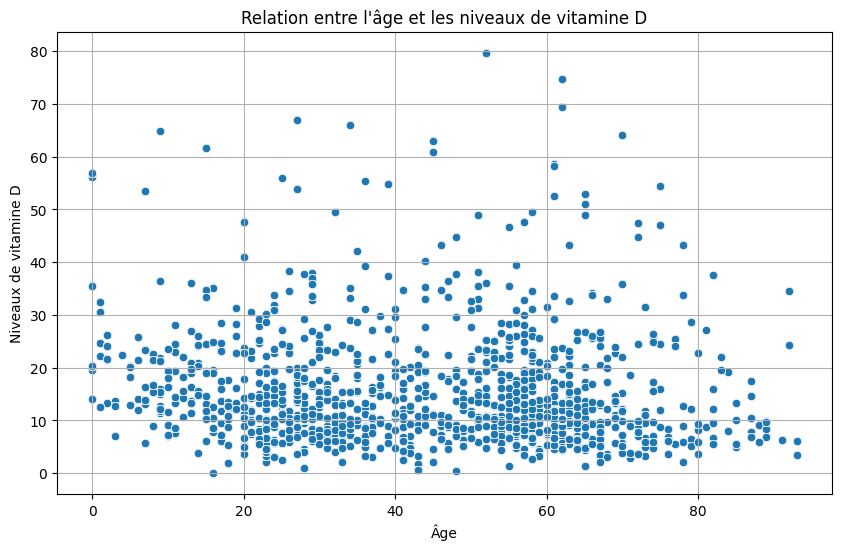

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot avec Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='Vitamine_D', data=finaldata)
plt.title('Relation entre l\'âge et les niveaux de vitamine D')
plt.xlabel('Âge')
plt.ylabel('Niveaux de vitamine D')
plt.grid(True)
plt.show()


La relation entre l'âge et les niveaux de vitamine D, telle que représentée dans ce graphique, ne semble pas être linéaire. Les niveaux de vitamine D varient indépendamment de l'âge, indiquant qu'il n'y a pas de relation linéaire évidente entre ces deux variables dans les données fournies. Donc on utilise pas Pearson , on va utiliser Spearman

**<span style="color:black; margin-left: 60px;"> a- En utilisant la corrélation de Spearman </span>**

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculer la corrélation de Spearman entre l'âge et la vitamine D
correlation_spearman_age = finaldata[['AGE', 'Vitamine_D']].corr(method='spearman').iloc[0, 1]

# Calculer la p-value de la corrélation de Spearman entre l'âge et la vitamine D
_, p_value_age = stats.spearmanr(finaldata['AGE'], finaldata['Vitamine_D'], nan_policy='omit')

# Afficher les résultats
print(f"Corrélation de Spearman entre l'âge et la vitamine D : {correlation_spearman_age}")
print(f"P-value de la corrélation de Spearman entre l'âge et la vitamine D : {p_value_age}")


Corrélation de Spearman entre l'âge et la vitamine D : -0.188286121460559
P-value de la corrélation de Spearman entre l'âge et la vitamine D : 5.9063392501236935e-164


La corrélation de Spearman obtenue entre l'âge et les niveaux de vitamine D (-0.1882) indique une relation statistique entre ces deux variables. Cette corrélation est considérée comme faible, ce qui signifie que bien qu'il existe une tendance observable, elle n'est pas très forte. Spearman a été choisi comme méthode de corrélation car elle évalue les relations monotones entre les variables, c'est-à-dire qu'elle est appropriée lorsque la relation entre les variables n'est pas nécessairement linéaire mais plutôt croissante ou décroissante de manière régulière. Dans notre étude, cette corrélation négative suggère que, en moyenne, à mesure que l'âge des individus augmente, leurs niveaux de vitamine D tendent à diminuer. Cependant, la valeur de -0.1882 indique que cette tendance n'est pas uniforme pour tous les individus et peut être influencée par d'autres facteurs tels que l'exposition au soleil, les habitudes alimentaires et les variations individuelles dans le métabolisme de la vitamine D. Ainsi, bien que significative, cette corrélation faible souligne la complexité des interactions entre l'âge et les niveaux de vitamine D, nécessitant une analyse approfondie et une considération des multiples facteurs influençant ces résultats.


**P-value (5.91e-164) :** Cette valeur de p est extrêmement faible, bien en dessous du seuil conventionnel de 0.05. Cela indique une très forte certitude que la corrélation observée entre l'âge et les niveaux de vitamine D n'est pas due au hasard. En d'autres termes, il est peu probable que cette corrélation soit le résultat de la chance ou de la variabilité aléatoire des données.

**<span style="color:green; margin-left: 40px;">I - 2 - Corrélation entre Vitamine D et le sexe</span>**

**<span style="color:black; margin-left: 60px;"> a- En utilisant la corrélation de Spearman </span>**

In [45]:
import pandas as pd
import scipy.stats as stats
# Vérifier s'il y a des valeurs manquantes dans la colonne Vitamine_D
print(f"Nombre de valeurs manquantes dans Vitamine_D : {finaldata['Vitamine_D'].isnull().sum()}")

# Convertir le sexe en valeur numérique si nécessaire
finaldata['Sexe_Num'] = finaldata['Sexe'].map({'M': 0, 'F': 1})

# Calculer la corrélation de Spearman entre Sexe_Num et Vitamine_D
correlation_sexe_vitamineD, p_value = stats.spearmanr(finaldata['Sexe_Num'], finaldata['Vitamine_D'], nan_policy='omit')

# Afficher les résultats
print(f"Corrélation entre le sexe et la vitamine D (Spearman) : {correlation_sexe_vitamineD}")
print(f"P-value de la corrélation de Spearman entre le sexe et la vitamine D : {p_value}")

Nombre de valeurs manquantes dans Vitamine_D : 0
Corrélation entre le sexe et la vitamine D (Spearman) : -0.22125755989228396
P-value de la corrélation de Spearman entre le sexe et la vitamine D : 3.497969158631477e-227


**La corrélation de Spearman de -0.2213 obtenue entre le sexe (encodé numériquement) et les niveaux de vitamine D suggère une relation faible à modérée dans l'échantillon analysé. Cette valeur négative indique qu'il existe une légère tendance où les niveaux de vitamine D peuvent être légèrement plus bas chez un sexe par rapport à l'autre. (les hommes ont des niveaux de vitamine D plus élevés que les femmes )**

**De plus, la p-value très proche de zéro (3.50e-227) suggère une forte significativité statistique de cette corrélation. En d'autres termes, il y a une forte indication que le sexe influence les niveaux de vitamine D dans votre échantillon de données.**


**<span style="color:green; margin-left: 40px;">I - 3 - Corrélation entre Vitamine D et les autres tests</span>**

**<span style="color:black; margin-left: 60px;">a - Etude de corrélation visuellement à travers un nuage de points  </span>**

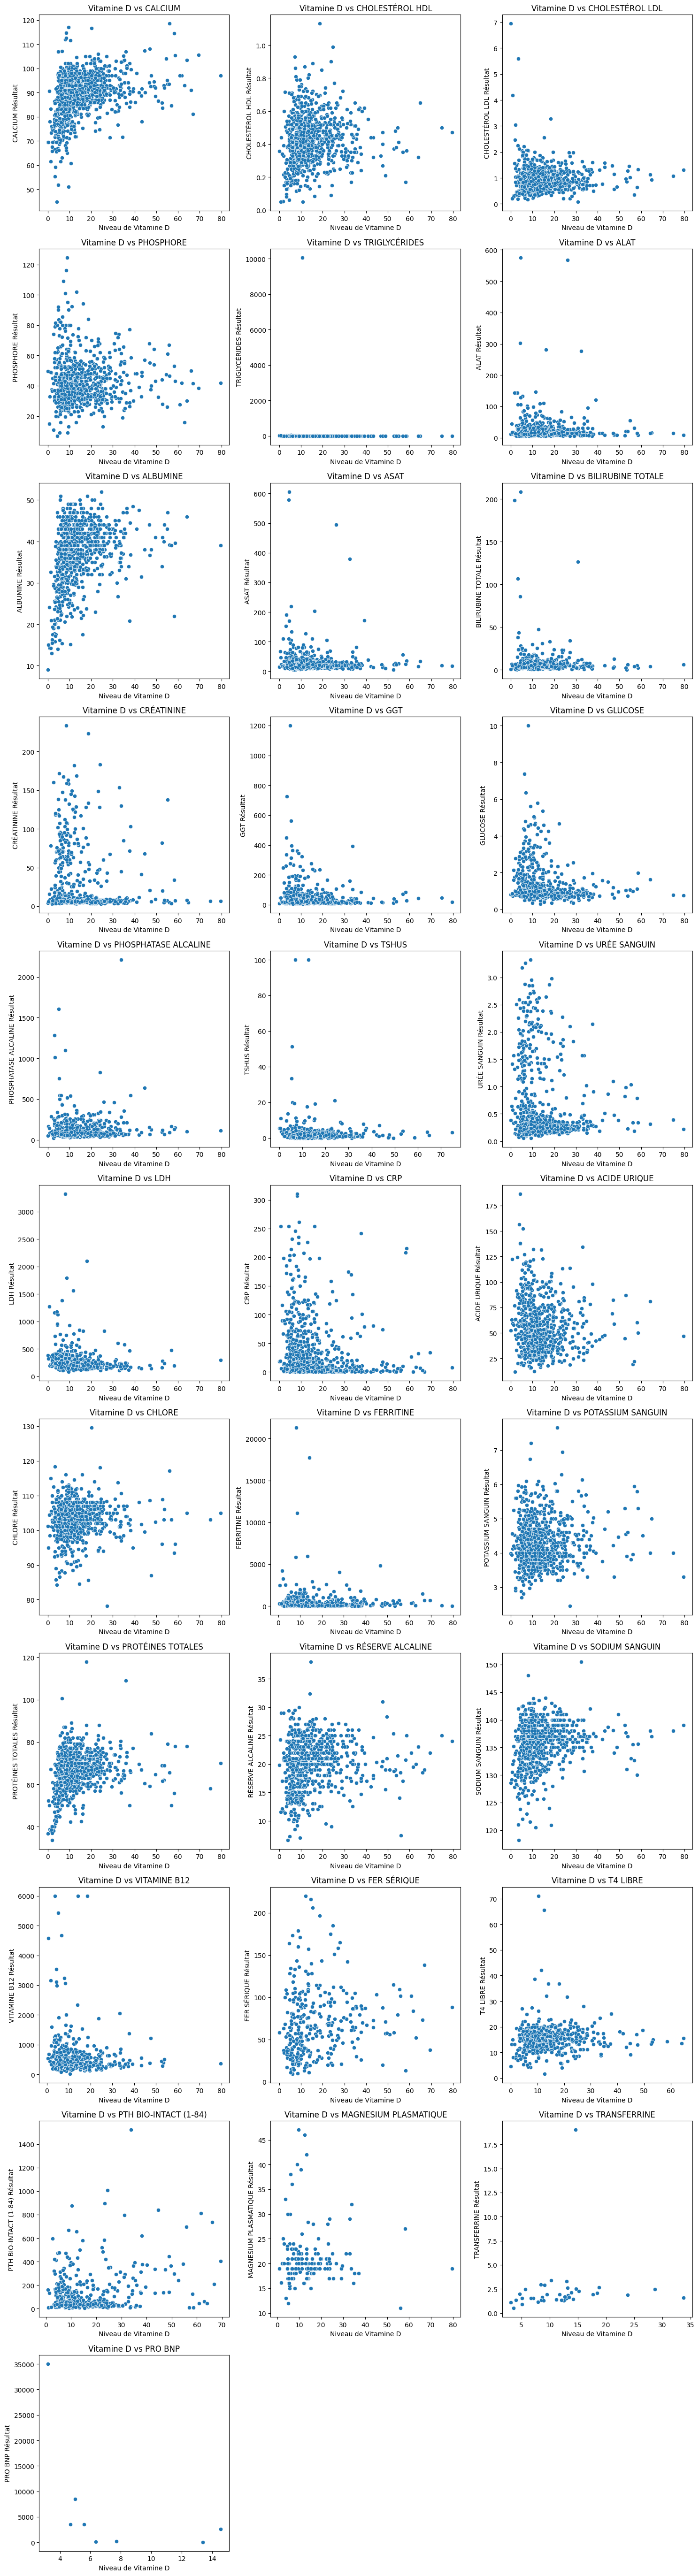

In [46]:
import seaborn as sns


# Filtrer les lignes où l'examen est "VITAMINE D"
vitamin_d_df = df_new[df_new['Examen'] == 'VITAMINE D']

# Calculer la moyenne des niveaux de vitamine D pour chaque patient
vitamin_d_avg = vitamin_d_df.groupby('IPP')['Résultat'].mean().reset_index()
vitamin_d_avg = vitamin_d_avg.rename(columns={'Résultat': 'Vitamine_D'})

# Fusionner les niveaux moyens de vitamine D dans le DataFrame principal
data = df_new.merge(vitamin_d_avg, on='IPP')

# Supprimer les lignes où "Examen" est "VITAMINE D"
data = data[data['Examen'] != 'VITAMINE D']

# Calculer la moyenne des résultats pour chaque type d'examen pour chaque patient
exam_avg = data.groupby(['IPP', 'Examen'])['Résultat'].mean().reset_index()

# Fusionner les niveaux moyens de vitamine D dans le DataFrame des examens moyens
final_data = exam_avg.merge(vitamin_d_avg, on='IPP')

# Créer des nuages de points pour chaque examen
unique_exams = final_data['Examen'].unique()
num_exams = len(unique_exams)

# Définir le nombre de colonnes et de lignes
cols = 3
rows = (num_exams + cols - 1) // cols  # Calculer le nombre de lignes nécessaires

# Définir la taille de la figure en fonction du nombre de colonnes et de lignes
plt.figure(figsize=(5 * cols, 5 * rows))

for i, exam in enumerate(unique_exams, 1): 
    plt.subplot(rows, cols, i)
    exam_df = final_data[final_data['Examen'] == exam]
    sns.scatterplot(x='Vitamine_D', y='Résultat', data=exam_df)
    plt.title(f'Vitamine D vs {exam}')
    plt.xlabel('Niveau de Vitamine D')
    plt.ylabel(f'{exam} Résultat')

plt.tight_layout()
plt.show()

### <span style="color:blue">Analyse de la Corrélation avec la Vitamine D</span>

**1. Vitamine D vs CALCIUM :** Il semble y avoir une légère tendance positive indiquant que des niveaux plus élevés de vitamine D sont associés à des niveaux légèrement plus élevés de calcium, bien que la dispersion soit assez importante.

**2. Vitamine D vs CHOLESTEROL HDL/LDL :** La relation avec le CHOLESTEROL HDL est dispersée, mais il semble y avoir une légère tendance positive. Pour le CHOLESTEROL LDL, il semble y avoir une tendance négative, suggérant que des niveaux plus élevés de vitamine D sont associés à des niveaux plus faibles de LDL.

**3. Vitamine D vs PHOSPHORE :** La relation semble être faiblement positive, mais encore une fois, il y a beaucoup de dispersion.

**4. Vitamine D vs TRIGLYCERIDES :** Il y a une concentration importante de points à des niveaux bas de triglycérides, ce qui peut indiquer que la plupart des échantillons ont des niveaux normaux de triglycérides, sans relation claire avec la vitamine D.

**5. Vitamine D vs ALAT/ASAT/GGT :** Ces relations ne montrent pas de tendances claires, avec une dispersion significative, indiquant probablement une faible corrélation.

**6. Vitamine D vs BILIRUBINE TOTALE :** Une relation négative pourrait être observée ici, où des niveaux plus élevés de vitamine D sont associés à des niveaux plus bas de bilirubine totale.

**7. Vitamine D vs CREATININE :** Il y a une dispersion avec une possible tendance positive légère, mais la relation n'est pas très forte.

**8. Vitamine D vs GLUCOSE :** La dispersion est importante avec une tendance négative possible, suggérant que des niveaux plus élevés de vitamine D peuvent être associés à des niveaux plus bas de glucose.

**9. Vitamine D vs PHOSPHATASE ALCALINE :** La relation est assez dispersée avec quelques valeurs extrêmes, mais il y a une légère tendance négative, suggérant que des niveaux plus élevés de vitamine D sont associés à des niveaux plus bas de phosphatase alcaline.

**10. Vitamine D vs TSHS :** La relation semble être faible et dispersée, sans tendance claire visible.

**11. Vitamine D vs URÉE SANGUIN :** Il y a une dispersion importante avec une légère tendance négative, indiquant que des niveaux plus élevés de vitamine D pourraient être associés à des niveaux plus bas d'urée sanguine.

**12. Vitamine D vs LDH :** Il y a une tendance négative notable, où des niveaux plus élevés de vitamine D sont associés à des niveaux plus bas de LDH.

**13. Vitamine D vs CRP :** La relation est assez dispersée avec une tendance négative, suggérant que des niveaux plus élevés de vitamine D pourraient être associés à des niveaux plus bas de CRP.

**14. Vitamine D vs ACIDE URIQUE :** Il y a une dispersion importante avec une légère tendance négative, mais sans relation très claire.

**15. Vitamine D vs CHLORE :** La relation est très dispersée avec une faible tendance négative, suggérant une association possible mais faible entre des niveaux plus élevés de vitamine D et des niveaux plus bas de chlore.

**16. Vitamine D vs FERRITINE :** La relation est très dispersée avec des points concentrés dans certaines zones, indiquant une relation faible et non claire.

**17. Vitamine D vs POTASSIUM SANGUIN :** La relation semble très dispersée, sans tendance claire visible.

**18. Vitamine D vs PROTÉINES TOTALES :** Il y a une dispersion importante avec une légère tendance négative, mais sans relation très claire.

**19. Vitamine D vs FER SÉRIQUE :** La relation est très dispersée, sans tendance claire visible.

**20. Vitamine D vs SODIUM SANGUIN :** La relation semble légèrement positive, où des niveaux plus élevés de vitamine D sont associés à des niveaux plus élevés de sodium sanguin, mais la dispersion est également importante.

**21. Vitamine D vs VITAMINE B12 :** Il y a une tendance négative où des niveaux plus élevés de vitamine D sont associés à des niveaux plus bas de vitamine B12. Cependant, la dispersion est importante, indiquant une relation faible.

**22. Vitamine D vs T4 LIBRE :** La relation montre une légère tendance négative, suggérant que des niveaux plus élevés de vitamine D pourraient être associés à des niveaux plus bas de T4 libre. Toutefois, cette relation est également faible avec beaucoup de dispersion.

**23. Vitamine D vs MAGNÉSIUM PLASMATIQUE :** La relation est assez dispersée sans tendance claire visible. Il y a quelques valeurs extrêmes, mais la majorité des points sont concentrés dans une plage étroite de niveaux de magnésium plasmatique.

**24. Vitamine D vs TRANSFERRINE :** Il y a une dispersion importante avec une possible tendance positive très légère, mais cette relation semble faible et non significative.

**25. Vitamine D vs PRO BNP :** La relation est très dispersée avec quelques valeurs extrêmes, mais sans tendance claire visible. La plupart des points sont concentrés à des niveaux bas de PRO BNP, avec quelques exceptions notables.


**<span style="color:black; margin-left: 60px;"> b- En utilisant la corrélation de Spearman </span>**

In [47]:
from scipy.stats import spearmanr
import seaborn as sns

# Calculer les corrélations de Spearman entre les niveaux de vitamine D et les autres examens
correlation_results = {}
for exam in final_data['Examen'].unique():
    exam_df = final_data[final_data['Examen'] == exam]
    if len(exam_df) > 1:
        # Extraire les résultats des deux examens
        exam_results = exam_df['Résultat']
        vitamin_d_results = exam_df['Vitamine_D']
        # Calculer la corrélation de Spearman
        correlation, p_value = spearmanr(exam_results, vitamin_d_results)
        correlation_results[exam] = (correlation, p_value)

# Afficher les résultats de la corrélation
for exam, (corr, p_val) in correlation_results.items():
    print(f"Examen: {exam}, Corrélation de Spearman: {corr:.4f}, p-value: {p_val:.4e}")

Examen: CALCIUM, Corrélation de Spearman: 0.3679, p-value: 3.5721e-32
Examen: CHOLESTÉROL HDL, Corrélation de Spearman: 0.1650, p-value: 2.5749e-06
Examen: CHOLESTÉROL LDL, Corrélation de Spearman: -0.0027, p-value: 9.3864e-01
Examen: PHOSPHORE, Corrélation de Spearman: 0.0131, p-value: 7.2115e-01
Examen: TRIGLYCÉRIDES, Corrélation de Spearman: -0.1274, p-value: 2.2431e-04
Examen: ALAT, Corrélation de Spearman: 0.0133, p-value: 6.9945e-01
Examen: ALBUMINE, Corrélation de Spearman: 0.3810, p-value: 5.7395e-31
Examen: ASAT, Corrélation de Spearman: 0.0188, p-value: 5.8141e-01
Examen: BILIRUBINE TOTALE, Corrélation de Spearman: 0.0017, p-value: 9.6399e-01
Examen: CRÉATININE, Corrélation de Spearman: -0.1334, p-value: 4.1787e-05
Examen: GGT, Corrélation de Spearman: -0.1416, p-value: 1.1398e-04
Examen: GLUCOSE, Corrélation de Spearman: -0.2285, p-value: 3.0074e-11
Examen: PHOSPHATASE ALCALINE, Corrélation de Spearman: -0.0103, p-value: 7.7948e-01
Examen: TSHUS, Corrélation de Spearman: -0.

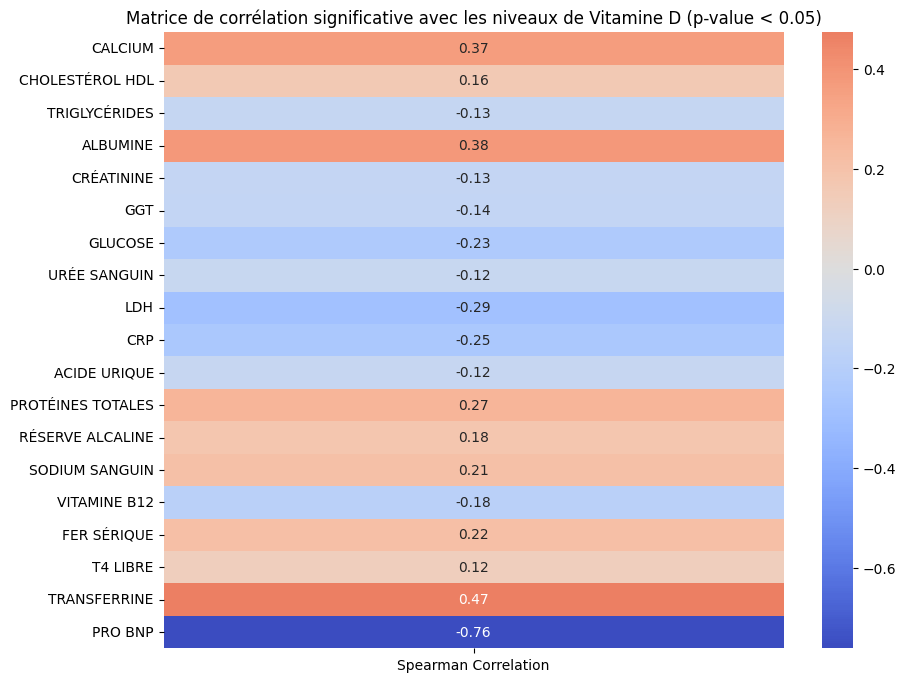

                   Spearman Correlation       p-value Significance
CALCIUM                        0.367924  3.572064e-32          ***
CHOLESTÉROL HDL                0.164950  2.574850e-06          ***
TRIGLYCÉRIDES                 -0.127442  2.243117e-04          ***
ALBUMINE                       0.381048  5.739517e-31          ***
CRÉATININE                    -0.133364  4.178683e-05          ***
GGT                           -0.141566  1.139819e-04          ***
GLUCOSE                       -0.228530  3.007383e-11          ***
URÉE SANGUIN                  -0.115254  9.728341e-04          ***
LDH                           -0.289335  1.870445e-12          ***
CRP                           -0.245522  4.537174e-14          ***
ACIDE URIQUE                  -0.121123  1.434520e-03           **
PROTÉINES TOTALES              0.265476  2.540725e-13          ***
RÉSERVE ALCALINE               0.180693  5.598822e-07          ***
SODIUM SANGUIN                 0.212403  6.534667e-10         

In [48]:
# Fonction pour ajouter les étoiles en fonction des p-values
def add_significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return ''

# Afficher les résultats avec un seuil de p-value de 0.05
significant_spearman_correlations = {exam: results for exam, results in correlation_results.items() if results[1] < 0.05}

# Convertir les résultats en DataFrame pour une meilleure visualisation
significant_spearman_correlations_df = pd.DataFrame.from_dict(significant_spearman_correlations, orient='index', columns=['Spearman Correlation', 'p-value'])

# Ajouter les étoiles de significativité
significant_spearman_correlations_df['Significance'] = significant_spearman_correlations_df['p-value'].apply(add_significance_stars)

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(significant_spearman_correlations_df[['Spearman Correlation']], annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matrice de corrélation significative avec les niveaux de Vitamine D (p-value < 0.05)')
plt.show()

# Afficher les résultats dans un tableau
print(significant_spearman_correlations_df)

In [49]:
# Filtrer les résultats avec trois étoiles
three_stars_results = significant_spearman_correlations_df.loc[significant_spearman_correlations_df['Significance'] == '***']

# Trier par ordre croissant de la p-value
three_stars_results_sorted = three_stars_results.sort_values(by='p-value')


# Afficher les résultats triés
print("Résultats avec trois étoiles triés par p-value croissante :")
print(three_stars_results_sorted)

Résultats avec trois étoiles triés par p-value croissante :
                   Spearman Correlation       p-value Significance
CALCIUM                        0.367924  3.572064e-32          ***
ALBUMINE                       0.381048  5.739517e-31          ***
CRP                           -0.245522  4.537174e-14          ***
PROTÉINES TOTALES              0.265476  2.540725e-13          ***
LDH                           -0.289335  1.870445e-12          ***
GLUCOSE                       -0.228530  3.007383e-11          ***
SODIUM SANGUIN                 0.212403  6.534667e-10          ***
RÉSERVE ALCALINE               0.180693  5.598822e-07          ***
CHOLESTÉROL HDL                0.164950  2.574850e-06          ***
CRÉATININE                    -0.133364  4.178683e-05          ***
FER SÉRIQUE                    0.216963  1.063943e-04          ***
GGT                           -0.141566  1.139819e-04          ***
TRIGLYCÉRIDES                 -0.127442  2.243117e-04          ***
VI

**<span style="color:black; margin-left: 60px;"> c- En utilisant la corrélation de kendall </span>**

In [50]:
from scipy.stats import kendalltau

# Calculer les corrélations de Kendall entre les niveaux de vitamine D et les autres examens
correlation_results = {}
for exam in final_data['Examen'].unique():
    exam_df = final_data[final_data['Examen'] == exam]
    if len(exam_df) > 1:
        # Extraire les résultats des deux examens
        exam_results = exam_df['Résultat']
        vitamin_d_results = exam_df['Vitamine_D']
        # Calculer la corrélation de Kendall
        correlation, p_value = kendalltau(exam_results, vitamin_d_results)
        correlation_results[exam] = (correlation, p_value)

# Afficher les résultats de la corrélation
for exam, (corr, p_val) in correlation_results.items():
    print(f"Examen: {exam}, Corrélation de Kendall: {corr:.4f}, p-value: {p_val:.4e}")

Examen: CALCIUM, Corrélation de Kendall: 0.2563, p-value: 6.5959e-32
Examen: CHOLESTÉROL HDL, Corrélation de Kendall: 0.1122, p-value: 2.3730e-06
Examen: CHOLESTÉROL LDL, Corrélation de Kendall: -0.0023, p-value: 9.2383e-01
Examen: PHOSPHORE, Corrélation de Kendall: 0.0100, p-value: 6.8534e-01
Examen: TRIGLYCÉRIDES, Corrélation de Kendall: -0.0871, p-value: 1.7545e-04
Examen: ALAT, Corrélation de Kendall: 0.0097, p-value: 6.7760e-01
Examen: ALBUMINE, Corrélation de Kendall: 0.2656, p-value: 1.7205e-30
Examen: ASAT, Corrélation de Kendall: 0.0151, p-value: 5.1437e-01
Examen: BILIRUBINE TOTALE, Corrélation de Kendall: 0.0010, p-value: 9.6999e-01
Examen: CRÉATININE, Corrélation de Kendall: -0.0895, p-value: 4.2486e-05
Examen: GGT, Corrélation de Kendall: -0.0971, p-value: 9.2163e-05
Examen: GLUCOSE, Corrélation de Kendall: -0.1519, p-value: 7.5606e-11
Examen: PHOSPHATASE ALCALINE, Corrélation de Kendall: -0.0082, p-value: 7.3927e-01
Examen: TSHUS, Corrélation de Kendall: -0.0369, p-value:

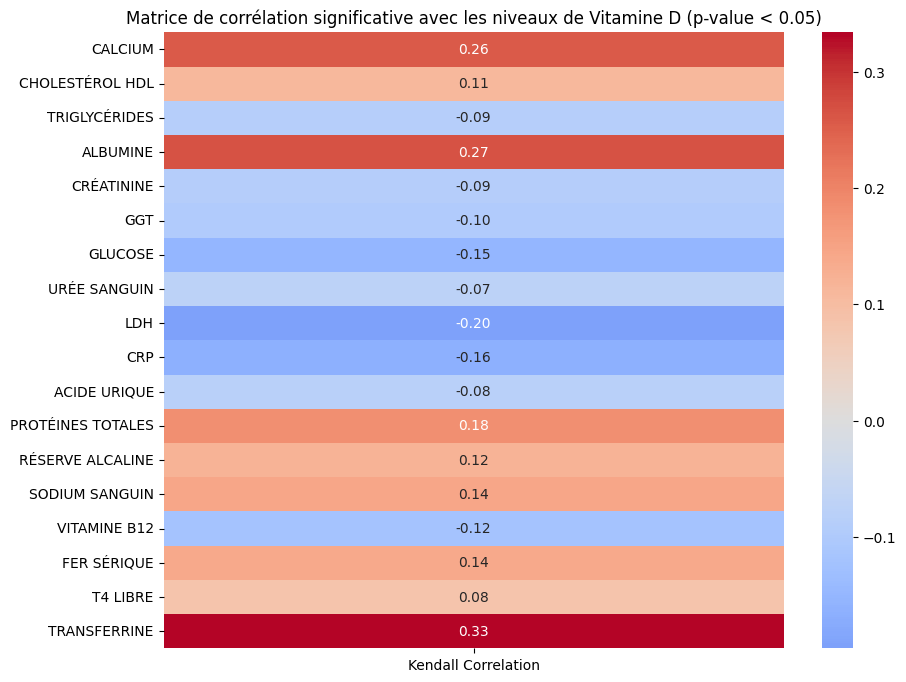

                   Kendall Correlation       p-value Significance
CALCIUM                       0.256252  6.595887e-32          ***
CHOLESTÉROL HDL               0.112201  2.372973e-06          ***
TRIGLYCÉRIDES                -0.087118  1.754543e-04          ***
ALBUMINE                      0.265592  1.720497e-30          ***
CRÉATININE                   -0.089461  4.248622e-05          ***
GGT                          -0.097122  9.216323e-05          ***
GLUCOSE                      -0.151939  7.560550e-11          ***
URÉE SANGUIN                 -0.074533  1.549624e-03           **
LDH                          -0.195368  3.506322e-12          ***
CRP                          -0.164776  8.619585e-14          ***
ACIDE URIQUE                 -0.081525  1.389021e-03           **
PROTÉINES TOTALES             0.182934  1.905062e-13          ***
RÉSERVE ALCALINE              0.121865  7.907633e-07          ***
SODIUM SANGUIN                0.144093  1.131149e-09          ***
VITAMINE B

In [51]:
# Fonction pour ajouter les étoiles en fonction des p-values
def add_significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return ''

# Afficher les résultats avec un seuil de p-value de 0.05
significant_Kendall_correlations = {exam: results for exam, results in correlation_results.items() if results[1] < 0.05}

# Convertir les résultats en DataFrame pour une meilleure visualisation
significant_Kendall_correlations_df = pd.DataFrame.from_dict(significant_Kendall_correlations, orient='index', columns=['Kendall Correlation', 'p-value'])

# Ajouter les étoiles de significativité
significant_Kendall_correlations_df['Significance'] = significant_Kendall_correlations_df['p-value'].apply(add_significance_stars)

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(significant_Kendall_correlations_df[['Kendall Correlation']], annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matrice de corrélation significative avec les niveaux de Vitamine D (p-value < 0.05)')
plt.show()

# Afficher les résultats dans un tableau
print(significant_Kendall_correlations_df)

In [52]:
# Filtrer les résultats avec trois étoiles
three_stars_results = significant_Kendall_correlations_df.loc[significant_Kendall_correlations_df['Significance'] == '***']

# Trier par ordre croissant de la p-value
three_stars_results_sorted = three_stars_results.sort_values(by='p-value')


# Afficher les résultats triés
print("Résultats avec trois étoiles triés par p-value croissante :")
print(three_stars_results_sorted)

Résultats avec trois étoiles triés par p-value croissante :
                   Kendall Correlation       p-value Significance
CALCIUM                       0.256252  6.595887e-32          ***
ALBUMINE                      0.265592  1.720497e-30          ***
CRP                          -0.164776  8.619585e-14          ***
PROTÉINES TOTALES             0.182934  1.905062e-13          ***
LDH                          -0.195368  3.506322e-12          ***
GLUCOSE                      -0.151939  7.560550e-11          ***
SODIUM SANGUIN                0.144093  1.131149e-09          ***
RÉSERVE ALCALINE              0.121865  7.907633e-07          ***
CHOLESTÉROL HDL               0.112201  2.372973e-06          ***
CRÉATININE                   -0.089461  4.248622e-05          ***
GGT                          -0.097122  9.216323e-05          ***
TRIGLYCÉRIDES                -0.087118  1.754543e-04          ***
FER SÉRIQUE                   0.140446  2.161540e-04          ***
VITAMINE B12    

**<span style="color:green; margin-left: 40px;">I - 4 - Relation entre ln(PTH) et Vitamine D avec Modèle de Régression Linéaire<span>**

                            OLS Regression Results                            
Dep. Variable:                 ln_PTH   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.20
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           0.000314
Time:                        18:27:44   Log-Likelihood:                -631.26
No. Observations:                 427   AIC:                             1267.
Df Residuals:                     425   BIC:                             1275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9952      0.086     46.499      0.0

C:\Users\SuperElectro\AppData\Local\Temp\ipykernel_11000\1863161467.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ln_PTH'] = np.log(filtered_data['Résultat'])


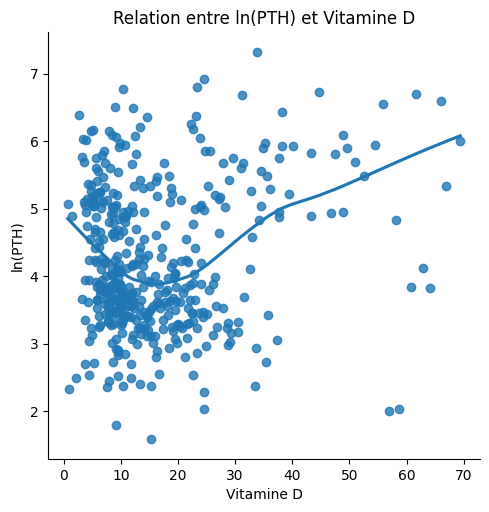

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Utilisation de final_data après la préparation précédente
# Assurez-vous que final_data est correctement préparé avec les moyennes et les niveaux moyens de Vitamine D

# Filtrer les données pour l'examen 'PTH BIO-INTACT (1-84)'
filtered_data = final_data[final_data['Examen'] == 'PTH BIO-INTACT (1-84)']

# Transformation logarithmique de PTH
filtered_data['ln_PTH'] = np.log(filtered_data['Résultat'])

# Modèle de régression linéaire entre ln(PTH) et Vitamine D
X = sm.add_constant(filtered_data['Vitamine_D'])
model = sm.OLS(filtered_data['ln_PTH'], X).fit()

# Résumé du modèle
print(model.summary())

# Visualisation de la relation entre ln(PTH) et Vitamine D avec la régression linéaire
sns.lmplot(x='Vitamine_D', y='ln_PTH', data=filtered_data, lowess=True)
plt.xlabel('Vitamine D')
plt.ylabel('ln(PTH)')
plt.title('Relation entre ln(PTH) et Vitamine D')
plt.show()


**<span style="color:green; margin-left: 20px;">Remarque !!!!!!</span>**

La raison principale pour laquelle nous avons effectué plusieurs analyses, telles que la transformation logarithmique, la régression linéaire et la visualisation graphique, plutôt que de se limiter à la corrélation de Spearman, est de fournir une compréhension approfondie et multidimensionnelle de la relation entre les niveaux de Vitamine D et de PTH BIO-INTACT (1-84). Voici quelques points clés :

**Nature de la Relation :** La corrélation de Spearman quantifie la relation monotone entre les deux variables sans supposer une forme spécifique de relation. En revanche, la régression linéaire permet de modéliser comment une variable (ici, Vitamine D) influence directement une autre (ln(PTH)) et fournit des estimations précises des coefficients et des intercepteurs.

**Interprétation de la Force et de la Direction :** La régression linéaire fournit des informations sur la force de la relation (coefficient de régression) et sa direction (positif ou négatif). Cela va au-delà de simplement savoir s'il y a une corrélation et permet de quantifier l'ampleur de l'effet de Vitamine D sur ln(PTH).

**Validation Statistique :** En utilisant des techniques comme la transformation logarithmique, on peut s'assurer que les données respectent les suppositions statistiques sous-jacentes, comme la normalité et l'homoscédasticité, ce qui améliore la validité des conclusions tirées de l'analyse.


## Résumé des résultats de la régression linéaire (OLS)

- **R-squared** : C'est le coefficient de détermination, qui mesure la proportion de la variance totale de la variable dépendante (ln_PTH) expliquée par les variables indépendantes (ici, uniquement Vitamine_D). Dans ce cas, R-squared est de 0.030, ce qui signifie que 3.0% de la variance de ln_PTH est expliquée par Vitamine_D.

- **Adj. R-squared** : C'est le coefficient de détermination ajusté, qui prend en compte le nombre de variables indépendantes dans le modèle. Ici, il est de 0.028, légèrement inférieur à R-squared, ce qui indique qu'ajouter Vitamine_D n'améliore pas beaucoup l'ajustement du modèle.

- **F-statistic** : C'est la statistique F du test d'ANOVA pour le modèle. Il évalue si l'ensemble des variables indépendantes (ici, seulement Vitamine_D) est significativement différent de zéro. Un F-statistic élevé avec un faible Prob (F-statistic) suggère que le modèle dans son ensemble est significatif. Ici, F-statistic est de 13.20 avec un Prob (F-statistic) très faible (0.000314), indiquant que le modèle dans son ensemble est significatif.

- **coef** : Ce sont les coefficients estimés pour les variables dans le modèle.
  - **const** : Le coefficient pour la constante (intercept). Ici, const = 3.9952.
  - **Vitamine_D** : Le coefficient pour la variable Vitamine_D. Ici, Vitamine_D = 0.0150. Cela signifie que pour une unité d'augmentation de Vitamine_D, ln_PTH augmente de 0.0150 unité, toutes choses égales par ailleurs.

- **P>|t|** : C'est la valeur p associée au test t pour chaque coefficient. Elle évalue si chaque coefficient est statistiquement significatif. Dans ce cas, les deux coefficients (const et Vitamine_D) ont une valeur p très faible (0.000 pour Vitamine_D), indiquant qu'ils sont statistiquement significatifs.

- **Omnibus**, **Prob(Omnibus)**, **Skew**, **Kurtosis** : Ce sont des tests et des mesures de la distribution des résidus. Omnibus teste la normalité des résidus. Prob(Omnibus) est la valeur p associée à Omnibus. Skew mesure l'asymétrie des résidus autour de zéro. Kurtosis mesure l'aplatissement des résidus par rapport à une distribution normale.

- **Durbin-Watson** : C'est un test de l'autocorrélation des résidus. Ici, il est de 1.983, proche de 2, ce qui suggère qu'il n'y a pas d'autocorrélation significative des résidus.

- **Cond. No.** : C'est le nombre conditionnel, qui mesure la collinéarité des variables indépendantes. Un nombre conditionnel élevé suggère une collinéarité. Ici, il est de 34.7, ce qui est relativement bas, indiquant une faible collinéarité entre les variables dans le modèle.

En résumé, bien que le modèle montre une faible valeur de R-squared (seulement 3.0% de la variance expliquée), il est statistiquement significatif avec un F-statistic élevé et des valeurs p faibles pour les coefficients. Cela suggère que la relation entre ln(PTH) et Vitamine D est significative mais faible, ce qui peut être exploré davantage en incluant d'autres variables pertinentes si disponibles.


## Chapitre 3 :  Prédiction des Niveaux de Vitamine D 


**Etapes à suivre pour chaque modèle :**

1-Encodage des variables catégorielles

2-Normalisation des données : Utilisation de StandardScaler pour normaliser les données d'entraînement et de test.

3-Entraînement du modèle 

4-Prédiction pour de nouvelles données : Transformation et normalisation des nouvelles données avant de les prédire avec le modèle entraîné.

**<span style="color:red; margin-left: 20px;">I - Pivotage et formatage des données </span>**

In [54]:
import pandas as pd

# Reprendre le calcul de la moyenne des niveaux de vitamine D pour chaque IPP
vitamin_d_df = df_new[df_new['Examen'] == 'VITAMINE D']
vitamin_d_avg = vitamin_d_df.groupby('IPP')['Résultat'].mean().reset_index()
vitamin_d_avg = vitamin_d_avg.rename(columns={'Résultat': 'Vitamine_D'})

# Reprendre le calcul de data sans modifier les résultats calculés
data = df_new.merge(vitamin_d_avg, on='IPP')
data = data[data['Examen'] != 'VITAMINE D']
exam_avg = data.groupby(['IPP', 'Examen'])['Résultat'].mean().reset_index()

# Ajouter l'âge et le sexe à final_data en utilisant IPP comme clé de fusion
finaldata = exam_avg.merge(vitamin_d_avg, on='IPP')

# Ajouter l'âge et le sexe de df_new à final_data
finaldata = finaldata.merge(df_new[['IPP', 'Sexe', 'AGE']].drop_duplicates(), on='IPP')

# Afficher les premières lignes de final_data pour vérification
finaldata


,IPP,Examen,Résultat,Vitamine_D,Sexe,AGE
0,309,CALCIUM,93.000,26.85,F,64
1,309,CHOLESTÉROL HDL,0.640,26.85,F,64
2,309,CHOLESTÉROL LDL,1.975,26.85,F,64
3,309,PHOSPHORE,47.000,26.85,F,64
4,309,TRIGLYCÉRIDES,1.915,26.85,F,64
...,...,...,...,...,...,...
20627,154449,GGT,66.000,9.20,F,47
20628,154449,GLUCOSE,0.840,9.20,F,47
20629,154449,TRIGLYCÉRIDES,0.590,9.20,F,47
20630,154449,TSHUS,2.270,9.20,F,47


In [55]:
# Reprendre le calcul de la moyenne des niveaux de vitamine D pour chaque IPP
vitamin_d_df = df_new[df_new['Examen'] == 'VITAMINE D']
vitamin_d_avg = vitamin_d_df.groupby('IPP')['Résultat'].mean().reset_index()
vitamin_d_avg = vitamin_d_avg.rename(columns={'Résultat': 'Vitamine_D'})

# Fusionner les données pour ajouter les moyennes de Vitamine D
data = df_new.merge(vitamin_d_avg, on='IPP')

# Exclure les entrées de Vitamine D des examens
data = data[data['Examen'] != 'VITAMINE D']

# Calculer la moyenne des résultats des examens par IPP et Examen
exam_avg = data.groupby(['IPP', 'Examen'])['Résultat'].mean().reset_index()

# Ajouter les moyennes de Vitamine D aux données
finaldata = exam_avg.merge(vitamin_d_avg, on='IPP')

# Ajouter l'âge et le sexe aux données finales
finaldata = finaldata.merge(df_new[['IPP', 'Sexe', 'AGE']].drop_duplicates(), on='IPP')

# Pivoter les données pour avoir chaque test comme une colonne avec les résultats sous chaque IPP
finaldata_pivot = finaldata.pivot(index='IPP', columns='Examen', values='Résultat').reset_index()

# Ajouter les colonnes d'âge, de sexe et de Vitamine D
finaldata_pivot = finaldata_pivot.merge(finaldata[['IPP', 'AGE', 'Sexe', 'Vitamine_D']].drop_duplicates(), on='IPP', how='left')

# Filtrer pour garder seulement les tests requis
tests = ['AGE', 'Sexe', 'CALCIUM', 'ALBUMINE', 'CRP', 'PROTÉINES TOTALES', 'LDH', 'GLUCOSE' , 'SODIUM SANGUIN']
finaldata_pivot = finaldata_pivot[['IPP'] + tests + ['Vitamine_D']]

# Suppression des lignes avec des valeurs manquantes
finaldata_pivot = finaldata_pivot.dropna()

# Afficher les premières lignes pour vérifier la structure
print(finaldata_pivot.head(20))

      IPP  AGE Sexe    CALCIUM   ALBUMINE         CRP  PROTÉINES TOTALES  \
6    1609   55    F  96.000000  39.000000   10.720000          59.000000   
8    1956   23    F  84.000000  31.000000   10.210000          55.000000   
11   2484   53    F  94.000000  45.000000    2.120000          72.000000   
17   2907   54    F  90.000000  35.600000   36.270000          68.000000   
18   3016   57    F  84.000000  29.000000   46.660000          56.000000   
25   3338   16    M  98.500000  40.000000    9.850000          76.000000   
32   3986   54    M  89.000000  42.000000    0.750000          64.000000   
37   4170   51    F  88.500000  41.500000    4.095000          63.500000   
39   4332   43    F  89.500000  33.750000   33.901429          66.428571   
46   4982   32    F  93.500000  41.666667   12.006667          68.666667   
47   5032   70    M  81.400000  31.375000   57.011818          56.650000   
55   6347   34    F  89.000000  36.000000    2.010000          57.000000   
59   7017   

In [56]:
finaldata_pivot.shape

(471, 11)

**<span style="color:red; margin-left: 20px;">II - Entrainement du modèle (Fitting) </span>**

**<span style="color:green; margin-left: 40px;">II - 1 - Régression Linéaire<span>**

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Sélection des caractéristiques et de la cible
features = ['AGE', 'Sexe', 'CALCIUM', 'ALBUMINE', 'CRP', 'PROTÉINES TOTALES', 'LDH', 'GLUCOSE' , 'SODIUM SANGUIN']
X = finaldata_pivot[features]
y = finaldata_pivot['Vitamine_D']

# Encoder les variables catégorielles et conserver les autres colonnes
categorical_cols = ['Sexe']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = ct.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalisation des données d'entraînement et de test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prédiction sur les données de test
y_pred_reg = model.predict(X_test_scaled)

# Évaluation du modèle sur les données de test
score = model.score(X_test_scaled, y_test)
print(f"Score R^2 sur l'ensemble de test : {score}")

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
print(f"Erreur quadratique moyenne (RMSE) : {rmse}")

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred_reg)
print(f"Erreur absolue moyenne (MAE) : {mae}")


Score R^2 sur l'ensemble de test : 0.20378592846301502
Erreur quadratique moyenne (RMSE) : 8.40055513461251
Erreur absolue moyenne (MAE) : 5.934024270597739


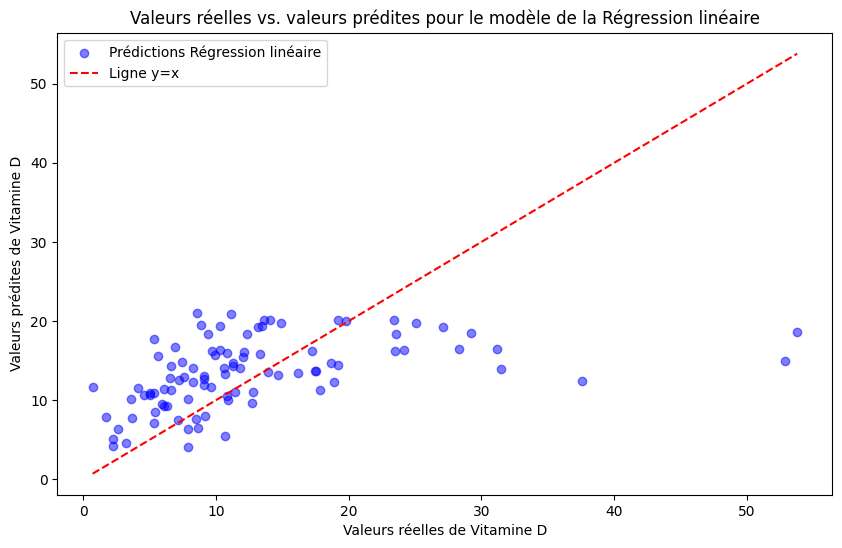

In [58]:
# Tracé des valeurs prédites vs valeurs réelles pour Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, color='blue', alpha=0.5, label='Prédictions Régression linéaire')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne y=x')

# Ajouter les étiquettes et le titre
plt.xlabel('Valeurs réelles de Vitamine D')
plt.ylabel('Valeurs prédites de Vitamine D')
plt.title('Valeurs réelles vs. valeurs prédites pour le modèle de la Régression linéaire')
plt.legend()
plt.show()


In [59]:
# Exemple de nouvelles données avec les tests et autres caractéristiques
new_data = pd.DataFrame({
    'CALCIUM': [92.5],
    'ALBUMINE': [43.0],
    'CRP': [0.465],
    'PROTÉINES TOTALES': [70],
    'LDH': [169],
    'GLUCOSE': [0.71],
    'SODIUM SANGUIN' : [135],
    'AGE': [28],
    'Sexe': ['M']
}, index=[0])  

# Encodage des variables catégorielles (si nécessaire)
new_data_encoded = ct.transform(new_data)

# Normalisation des nouvelles données
new_data_scaled = scaler.transform(new_data_encoded)

# Prédiction de Vitamine D pour les nouvelles données
predicted_vitamin_d = model.predict(new_data_scaled)
print(f"Prédiction de Vitamine D : {predicted_vitamin_d[0]}")

Prédiction de Vitamine D : 18.538349344866702


**<span style="color:green; margin-left: 40px;">II - 2 - Régression SVR (Support Vector Regression)<span>**

Meilleurs paramètres trouvés: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Score R^2 sur l'ensemble de test : 0.2262445934218219
RMSE sur l'ensemble de test : 8.281231216326935
MAE sur l'ensemble de test : 5.20772308831865
Prédiction de Vitamine D : 17.430890350101855


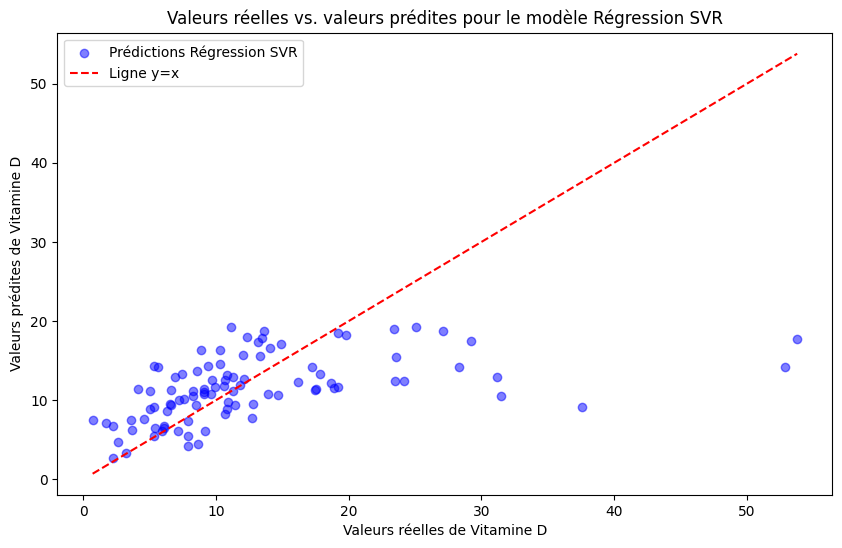

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Sélection des caractéristiques et de la cible
features = ['AGE', 'Sexe', 'CALCIUM', 'ALBUMINE', 'CRP', 'PROTÉINES TOTALES', 'LDH', 'GLUCOSE', 'SODIUM SANGUIN']
X = finaldata_pivot[features]
y = finaldata_pivot['Vitamine_D']

# Encoder les variables catégorielles et conserver les autres colonnes
categorical_cols = ['Sexe']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = ct.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalisation des données d'entraînement et de test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimisation des hyperparamètres avec Grid Search
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print("Meilleurs paramètres trouvés:", grid_search.best_params_)

# Entraînement du modèle SVR avec les meilleurs paramètres trouvés
best_svr = SVR(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
best_svr.fit(X_train_scaled, y_train)

# Prédiction sur les données de test
y_pred_svr = best_svr.predict(X_test_scaled)

# Évaluation du modèle
score = r2_score(y_test, y_pred_svr)
print(f"Score R^2 sur l'ensemble de test : {score}")

# Calcul de RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"RMSE sur l'ensemble de test : {rmse}")

# Calcul de MAE
mae = mean_absolute_error(y_test, y_pred_svr)
print(f"MAE sur l'ensemble de test : {mae}")

# Exemple de nouvelles données avec les tests et autres caractéristiques
new_data = pd.DataFrame({
    'CALCIUM': [92.5],
    'ALBUMINE': [43.0],
    'CRP': [0.465],
    'PROTÉINES TOTALES': [70],
    'LDH': [169],
    'GLUCOSE': [0.71],
    'SODIUM SANGUIN': [135],
    'AGE': [28],
    'Sexe': ['M']
}, index=[0])

# Encodage des variables catégorielles (si nécessaire)
new_data_encoded = ct.transform(new_data)

# Normalisation des nouvelles données
new_data_scaled = scaler.transform(new_data_encoded)

# Prédiction de Vitamine D pour les nouvelles données
predicted_vitamin_d = best_svr.predict(new_data_scaled)
print(f"Prédiction de Vitamine D : {predicted_vitamin_d[0]}")

# Tracé des valeurs prédites vs valeurs réelles pour SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.5, label='Prédictions Régression SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne y=x')

# Ajouter les étiquettes et le titre
plt.xlabel('Valeurs réelles de Vitamine D')
plt.ylabel('Valeurs prédites de Vitamine D')
plt.title('Valeurs réelles vs. valeurs prédites pour le modèle Régression SVR')
plt.legend()
plt.show()


**<span style="color:green; margin-left: 40px;">II - 3 - Random Forest<span>**

Meilleurs paramètres trouvés pour Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Score R^2 sur l'ensemble de test avec Random Forest : 0.15707498933214992
RMSE sur l'ensemble de test avec Random Forest : 8.643458124184654
MAE sur l'ensemble de test avec Random Forest : 6.035292379007304
Prédiction de Vitamine D avec Random Forest : 20.58857516418767


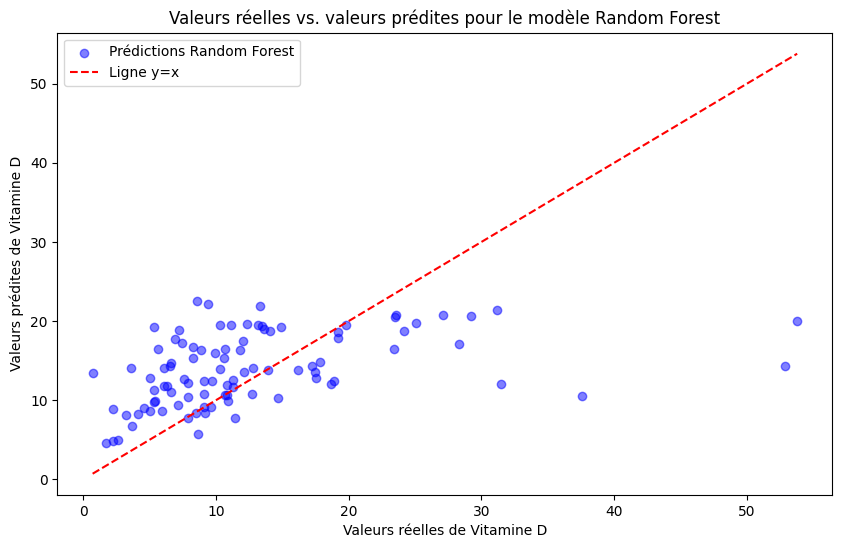

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Optimisation des hyperparamètres avec Grid Search (optionnel)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train_scaled, y_train)

# Obtention des meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés pour Random Forest:", grid_search_rf.best_params_)

# Entraînement du modèle Random Forest avec les meilleurs paramètres trouvés
best_rf = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Prédiction sur les données de test
y_pred_rf = best_rf.predict(X_test_scaled)

# Évaluation du modèle
score_rf = r2_score(y_test, y_pred_rf)
print(f"Score R^2 sur l'ensemble de test avec Random Forest : {score_rf}")

# Calcul de RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE sur l'ensemble de test avec Random Forest : {rmse_rf}")

# Calcul de MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE sur l'ensemble de test avec Random Forest : {mae_rf}")

# Prédiction de Vitamine D pour les nouvelles données
predicted_vitamin_d_rf = best_rf.predict(new_data_scaled)
print(f"Prédiction de Vitamine D avec Random Forest : {predicted_vitamin_d_rf[0]}")

# Tracé des valeurs prédites vs valeurs réelles pour Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Prédictions Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne y=x')

# Ajouter les étiquettes et le titre
plt.xlabel('Valeurs réelles de Vitamine D')
plt.ylabel('Valeurs prédites de Vitamine D')
plt.title('Valeurs réelles vs. valeurs prédites pour le modèle Random Forest')
plt.legend()
plt.show()


**<span style="color:green; margin-left: 40px;">II - 4 - HuberRegressor<span>**

Score R^2 sur l'ensemble de test avec Huber Regression : 0.23229133288857873
RMSE sur l'ensemble de test avec Huber Regression : 8.24880969027293
MAE sur l'ensemble de test avec Huber Regression : 5.377560508970317
Prédiction de Vitamine D avec Huber Regression : 17.495330641261948


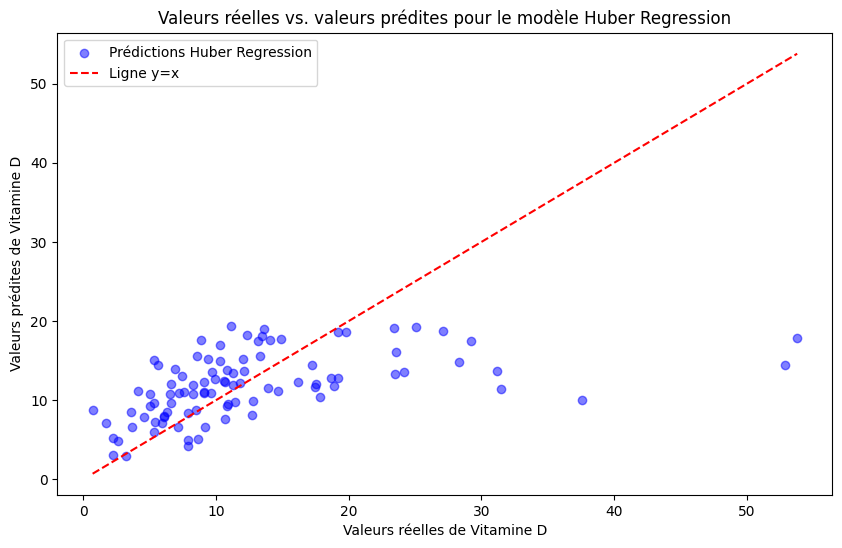

In [62]:
from sklearn.linear_model import HuberRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalisation des données d'entraînement et de test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle Huber Regression
huber = HuberRegressor()
huber.fit(X_train_scaled, y_train)

# Prédiction sur les données de test
y_pred_huber = huber.predict(X_test_scaled)

# Évaluation du modèle
score_huber = r2_score(y_test, y_pred_huber)
print(f"Score R^2 sur l'ensemble de test avec Huber Regression : {score_huber}")

# Calcul de RMSE
rmse_huber = np.sqrt(mean_squared_error(y_test, y_pred_huber))
print(f"RMSE sur l'ensemble de test avec Huber Regression : {rmse_huber}")

# Calcul de MAE
mae_huber = mean_absolute_error(y_test, y_pred_huber)
print(f"MAE sur l'ensemble de test avec Huber Regression : {mae_huber}")

# Prédiction de Vitamine D pour les nouvelles données
new_data_scaled = scaler.transform(new_data_encoded)
predicted_vitamin_d_huber = huber.predict(new_data_scaled)
print(f"Prédiction de Vitamine D avec Huber Regression : {predicted_vitamin_d_huber[0]}")

# Tracé des valeurs prédites vs valeurs réelles pour Huber Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_huber, color='blue', alpha=0.5, label='Prédictions Huber Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne y=x')
plt.xlabel('Valeurs réelles de Vitamine D')
plt.ylabel('Valeurs prédites de Vitamine D')
plt.title('Valeurs réelles vs. valeurs prédites pour le modèle Huber Regression')
plt.legend()
plt.show()


**<span style="color:red; margin-left: 20px;">III - Best Model</span>**

In [63]:
# Supposons que vous avez un dictionnaire `results` contenant les métriques pour chaque modèle
results = {
    'Régression linéaire': {'R²':0.20378592846301502, 'RMSE':8.40055513461251, 'MAE': 5.934024270597739},
    'Random Forest': {'R²': 0.15707498933214992, 'RMSE':8.643458124184654, 'MAE': 6.035292379007304},
    'SVR': {'R²':0.2262445934218219, 'RMSE': 8.281231216326935, 'MAE': 5.20772308831865},
    'Huber regression': {'R²': 0.23229133288857873, 'RMSE': 8.24880969027293, 'MAE': 5.377560508970317}
}

# Poids pour chaque métrique (les poids peuvent être ajustés selon l'importance relative)
weights = {'R²': 0.5, 'RMSE': 0.25, 'MAE': 0.25}

# Fonction pour calculer le score pondéré d'un modèle
def calculate_weighted_score(metrics, weights):
    return (weights['R²'] * metrics['R²']) - (weights['RMSE'] * metrics['RMSE']) - (weights['MAE'] * metrics['MAE'])

# Fonction pour trouver le meilleur modèle en fonction du score pondéré
def find_best_model(metrics_dict, weights):
    best_model = None
    best_score = float('-inf')
    for model, metrics in metrics_dict.items():
        score = calculate_weighted_score(metrics, weights)
        if score > best_score:
            best_model = model
            best_score = score
    return best_model, metrics_dict[best_model]

# Appel de la fonction pour trouver le meilleur modèle
best_model, best_metrics = find_best_model(results, weights)

# Affichage des résultats
print(f"Meilleur modèle : {best_model}")
print(f"R² : {best_metrics['R²']:.4f}")
print(f"RMSE : {best_metrics['RMSE']:.4f}")
print(f"MAE : {best_metrics['MAE']:.4f}")


Meilleur modèle : SVR
R² : 0.2262
RMSE : 8.2812
MAE : 5.2077


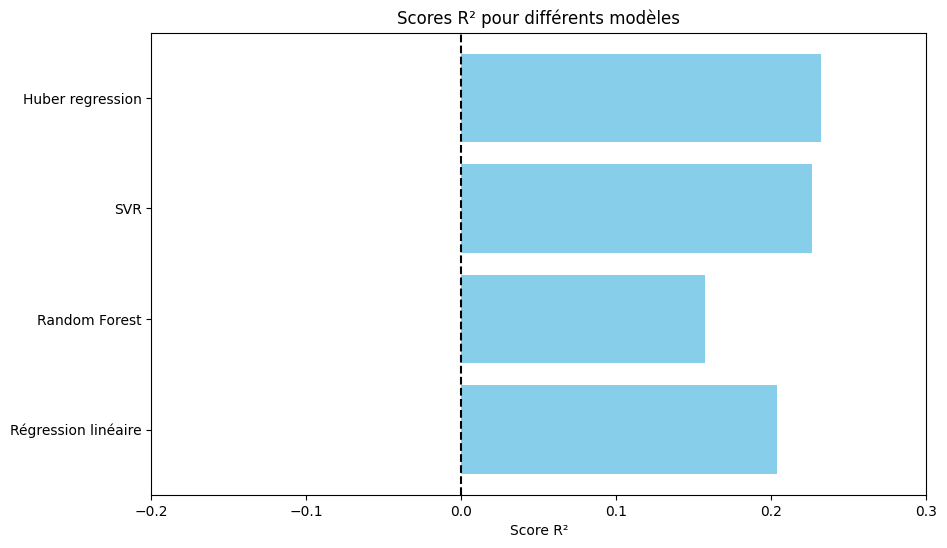

In [64]:
# Extraire les noms des modèles et leurs scores R²
models = list(results.keys())
r2_scores = [results[model]['R²'] for model in models]

# Création du DataFrame pour faciliter le tracé
df_results = pd.DataFrame({
    'Modèle': models,
    'R²': r2_scores
})

# Tracé des scores R² pour chaque modèle
plt.figure(figsize=(10, 6))
plt.barh(df_results['Modèle'], df_results['R²'], color='skyblue')
plt.xlabel('Score R²')
plt.title('Scores R² pour différents modèles')
plt.xlim([-0.2, 0.3])
plt.axvline(0, color='black', linestyle='--')
plt.show()
